In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 03 - Keypoints analyseren en verrijken
De gedetecteerde keypoints zullen ten eerste geanalyseerd worden: zijn er verbanden te vinden tussen de keypoints en poses?
Daarnaast zal de data verrijkt worden met bijvoorbeeld verhoudingen en afstanden tussen bepaalde keypoints, denk aan afstanden tussen keypoints.

#### Toelichting data
Elke pose bevat 17 coördinaten. De betekenis van elke 'keypoint' is als volgt:
- 0: nose
- 1: left_eye
- 2: right_eye
- 3: left_ear
- 4: right_ear
- 5: left_shoulder
- 6: right_shoulder
- 7: left_elbow
- 8: right_elbow
- 9: left_wrist
- 10: right_wrist
- 11: left_hip
- 12: right_hip
- 13: left_knee
- 14: right_knee
- 15: left_ankle
- 16: right_ankle

In [53]:
keypoints_train_df = pd.read_csv('analytics_df_train_YOLOv8m.csv', index_col=0, header=0)
#keypoints_train_df = pd.read_csv('analytics_df_train_YOLOv8n.csv', index_col=0, header=0)
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.914894,0.519160,0.314611,0.534587,0.305057,0.500624,0.305733,...,0.964929,0.988803,0.944336,0.976287,0.998331,0.998951,0.996827,0.998112,0.985257,0.989843
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.909827,0.509721,0.315518,0.524141,0.306418,0.489993,0.307169,...,0.988719,0.992654,0.980305,0.986543,0.999569,0.999681,0.999055,0.999343,0.993552,0.994910
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.906767,0.503642,0.196350,0.515195,0.174214,0.488498,0.178452,...,0.988172,0.980562,0.978341,0.970620,0.997048,0.996941,0.951542,0.950079,0.592972,0.569348
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.912517,0.497531,0.165511,0.515113,0.152043,0.480580,0.154027,...,0.992064,0.993749,0.985883,0.987890,0.999694,0.999757,0.998914,0.999167,0.988709,0.990854
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.901814,0.542198,0.162231,0.560624,0.147076,0.521831,0.149408,...,0.979026,0.988744,0.964820,0.977059,0.999151,0.999373,0.998319,0.998784,0.989322,0.991664


In [27]:
keypoints_train_df.describe()

,pose_code,confidence,x00,y00,x01,y01,x02,y02,x03,y03,...,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,2.302419,0.921619,0.488277,0.283545,0.500140,0.270343,0.475144,0.271182,0.515620,0.279759,...,0.977553,0.976715,0.951131,0.948533,0.997130,0.996803,0.983266,0.983427,0.966712,0.967407
std,1.683834,0.011306,0.068828,0.077871,0.069283,0.078707,0.070428,0.078177,0.074526,0.077886,...,0.056453,0.051271,0.101690,0.099897,0.018391,0.021325,0.112373,0.112599,0.125493,0.125928
min,0.000000,0.835354,0.228431,0.108218,0.248554,0.092117,0.217196,0.092781,0.296581,0.101129,...,0.398483,0.614398,0.164327,0.297862,0.806448,0.768120,0.030477,0.020547,0.001536,0.000733
25%,1.000000,0.915351,0.446430,0.257163,0.458525,0.242256,0.426105,0.244119,0.468481,0.250122,...,0.980278,0.984838,0.958736,0.968124,0.999294,0.999388,0.997687,0.997912,0.981232,0.984097
50%,2.000000,0.922659,0.491482,0.297372,0.502291,0.285627,0.478530,0.286855,0.519931,0.296812,...,0.990172,0.990632,0.978141,0.981352,0.999614,0.999688,0.998758,0.998891,0.989076,0.989767
75%,4.000000,0.928594,0.530415,0.323930,0.539033,0.310694,0.518978,0.311543,0.560196,0.319291,...,0.994166,0.993114,0.986273,0.986423,0.999779,0.999799,0.999159,0.999255,0.992529,0.993036
max,5.000000,0.949646,0.697912,0.549621,0.712372,0.531109,0.679222,0.531594,0.719380,0.544947,...,0.999084,0.996232,0.997942,0.991478,0.999932,0.999918,0.999701,0.999748,0.997150,0.997516


#### Stap 1. Keypoints analyseren

Eerst een visualisatie van de keypoints.

In [5]:
x_coordinates_cols = ['x00', 'x01', 'x02', 'x03', 'x04', 'x05','x06', 'x07', 'x08', 'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']
y_coordinates_cols = ['y00', 'y01', 'y02', 'y03', 'y04', 'y05','y06', 'y07', 'y08', 'y09', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16']
conf_coordinates_cols = ['v00', 'v01', 'v02', 'v03', 'v04', 'v05','v06', 'v07', 'v08', 'v09', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16']

x_coordinates_dict = {'x00': 'nose',
                      'x01': 'left_eye',
                      'x02': 'right_eye',
                      'x03': 'left_ear',
                      'x04': 'right_ear',
                      'x05': 'left_shoulder',
                      'x06': 'right_shoulder',
                      'x07': 'left_elbow',
                      'x08': 'right_elbow',
                      'x09': 'left_wrist',
                      'x10': 'right_wrist',
                      'x11': 'left_hip',
                      'x12': 'right_hip',
                      'x13': 'left_knee',
                      'x14': 'right_knee',
                      'x15': 'left_ankle',
                      'x16': 'right_ankle'}

y_coordinates_dict = {'y00': 'nose',
                      'y01': 'left_eye',
                      'y02': 'right_eye',
                      'y03': 'left_ear',
                      'y04': 'right_ear',
                      'y05': 'left_shoulder',
                      'y06': 'right_shoulder',
                      'y07': 'left_elbow',
                      'y08': 'right_elbow',
                      'y09': 'left_wrist',
                      'y10': 'right_wrist',
                      'y11': 'left_hip',
                      'y12': 'right_hip',
                      'y13': 'left_knee',
                      'y14': 'right_knee',
                      'y15': 'left_ankle',
                      'y16': 'right_ankle'}

conf_coordinates_dict = {'v00': 'nose',
                      'v01': 'left_eye',
                      'v02': 'right_eye',
                      'v03': 'left_ear',
                      'v04': 'right_ear',
                      'v05': 'left_shoulder',
                      'v06': 'right_shoulder',
                      'v07': 'left_elbow',
                      'v08': 'right_elbow',
                      'v09': 'left_wrist',
                      'v10': 'right_wrist',
                      'v11': 'left_hip',
                      'v12': 'right_hip',
                      'v13': 'left_knee',
                      'v14': 'right_knee',
                      'v15': 'left_ankle',
                      'v16': 'right_ankle'}

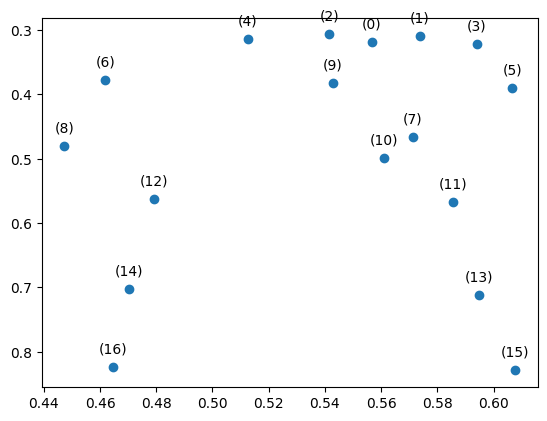

In [13]:
# Visualisatie van de keypoints
row = 200

coordinate_number = np.arange(0, 17, 1)

x_coordinates = np.zeros(17)
counter = 0
for x in x_coordinates_cols:
    x_coordinates[counter] = keypoints_train_df.iloc[row][x]
    counter += 1
x_coordinates

y_coordinates = np.zeros(17)
counter = 0
for y in y_coordinates_cols:
    y_coordinates[counter] = keypoints_train_df.iloc[row][y]
    counter += 1
y_coordinates

plt.scatter(x_coordinates, y_coordinates)

for x,y,z in zip(x_coordinates, y_coordinates, coordinate_number):

    label = f"({z})"
    plt.gca().invert_yaxis()
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

Je ziet hierboven dat de coördinaten t.o.v. de randen van de bounding boxes liggen. Het hoogste of laagste keypoint heeft dus niet y-coördinaat 0 of 1.

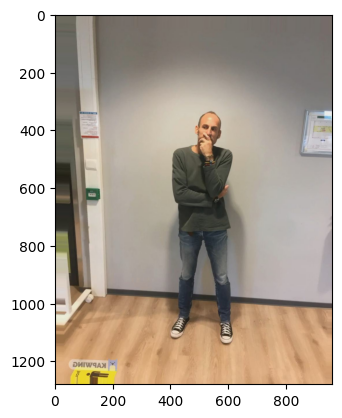

In [14]:
image = Image.open(keypoints_train_df.iloc[row]['path']).convert('RGB')
plt.imshow(image)

Zoeken naar verbanden / clusters van keypoints voor elk van de poses m.b.v. boxplots en scatterplots

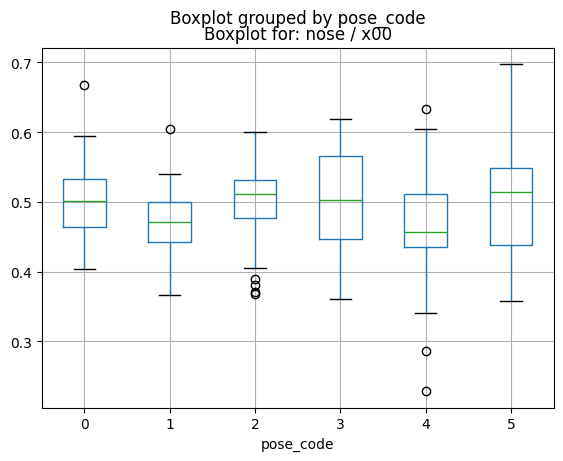

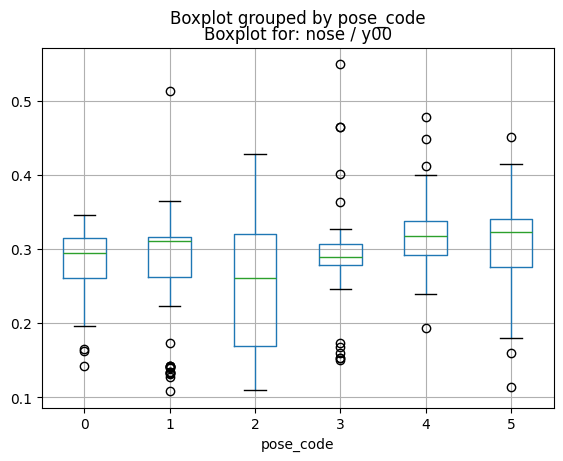

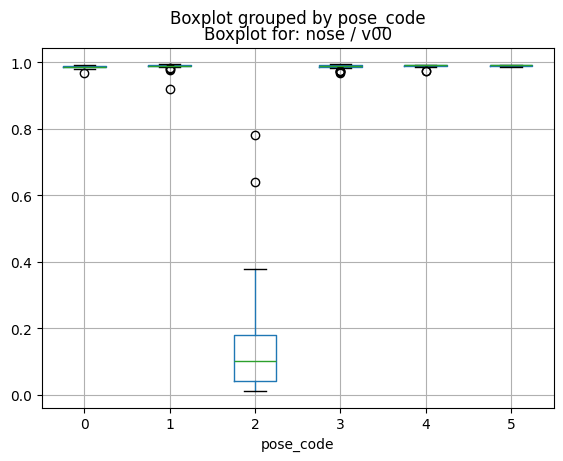

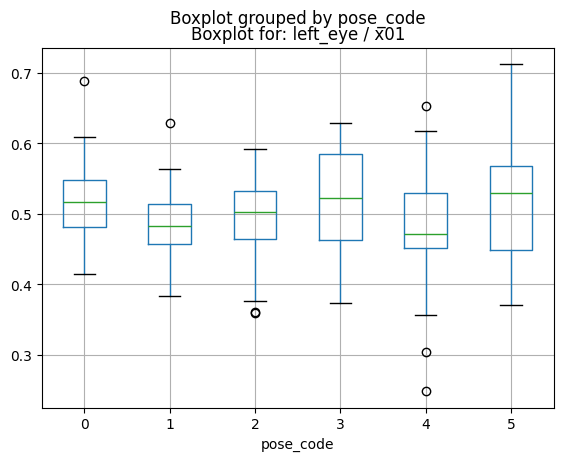

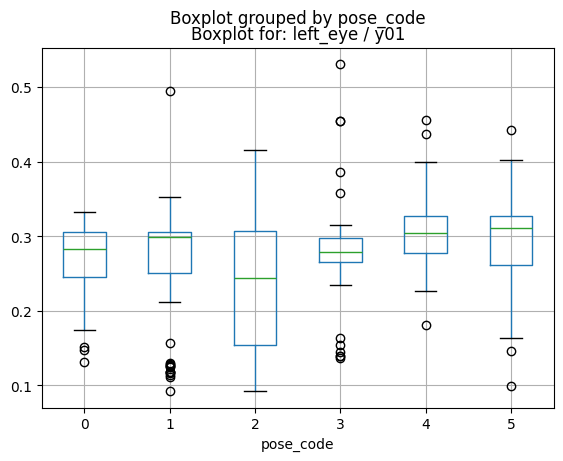

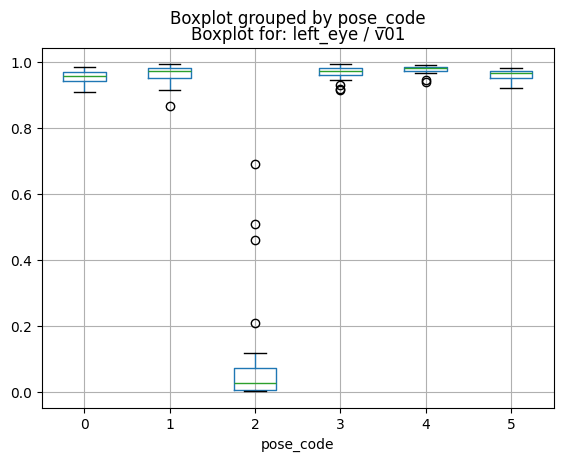

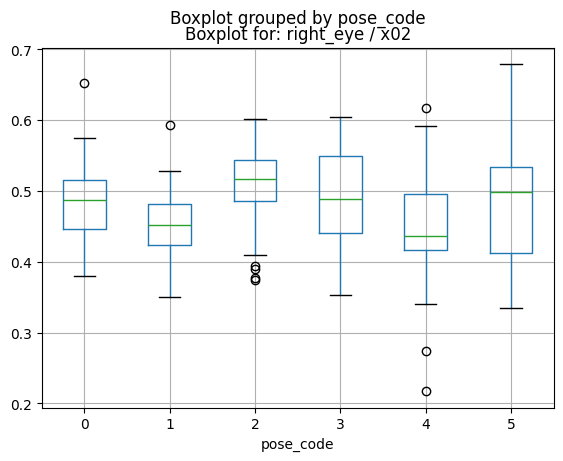

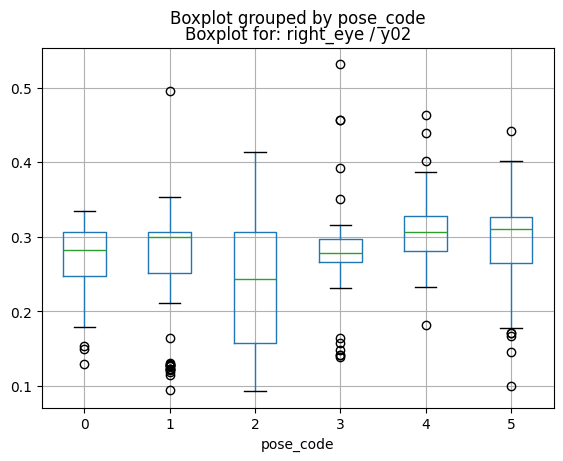

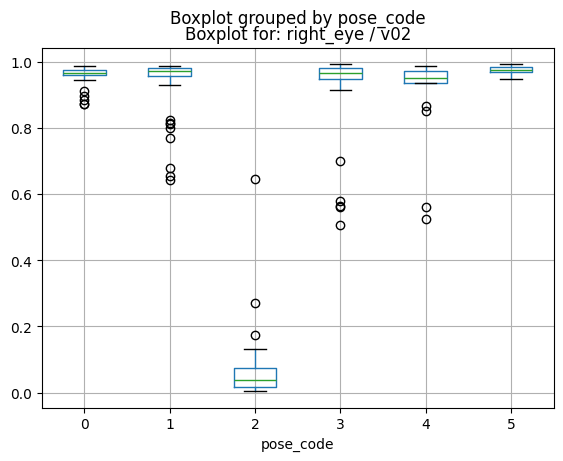

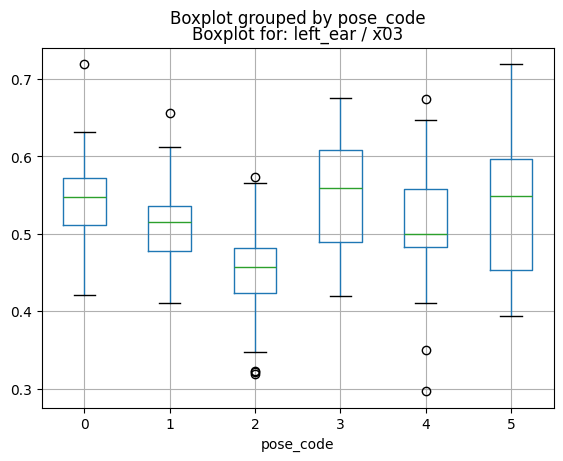

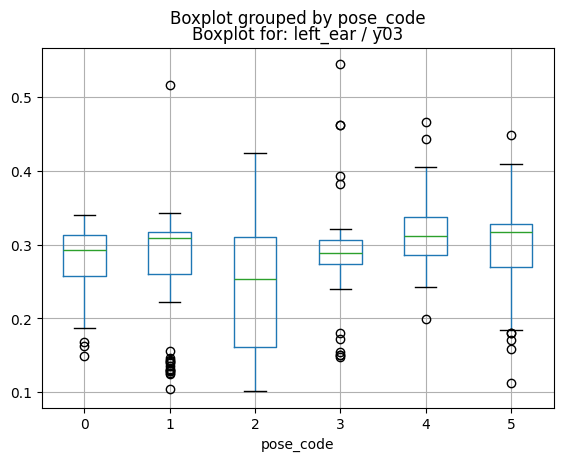

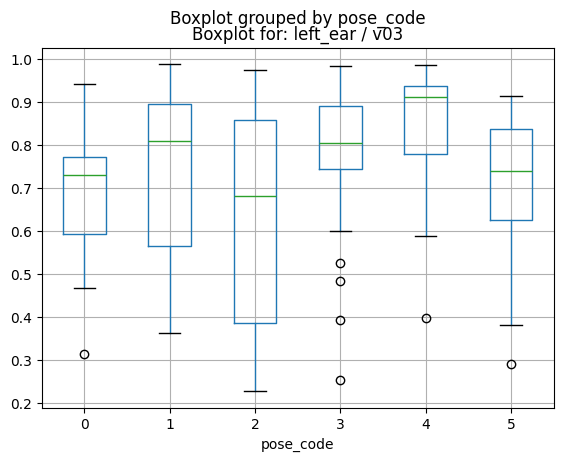

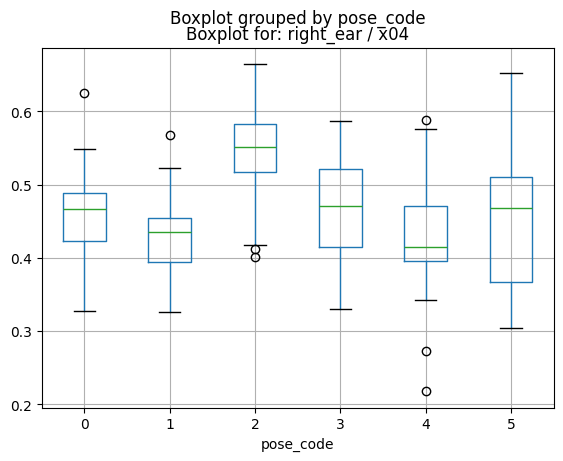

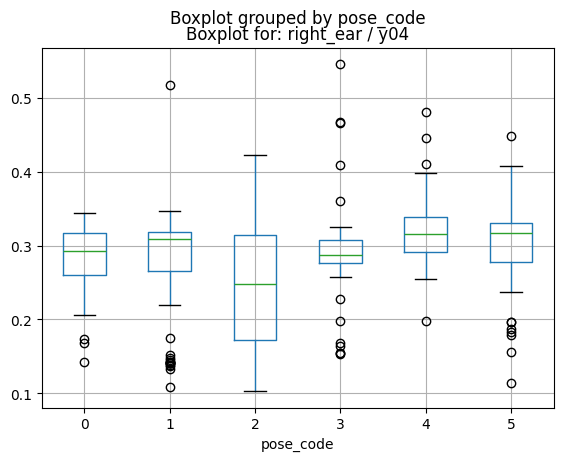

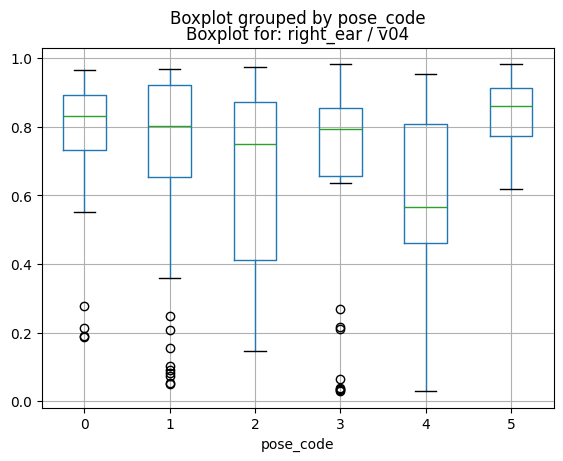

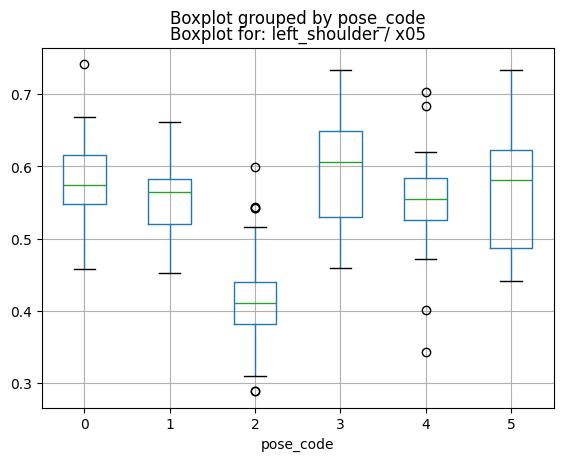

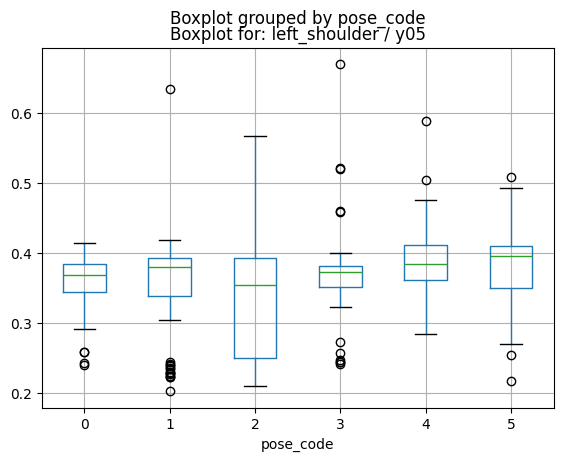

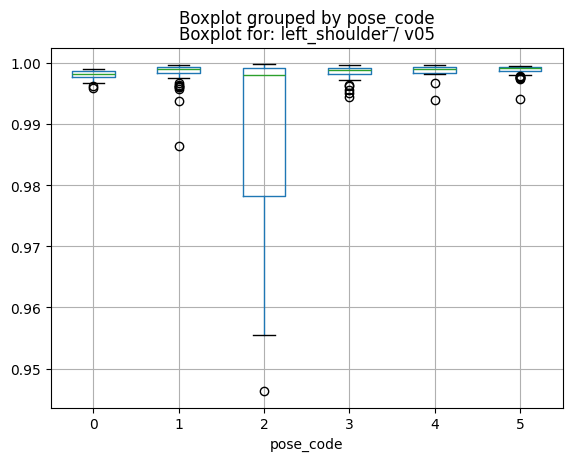

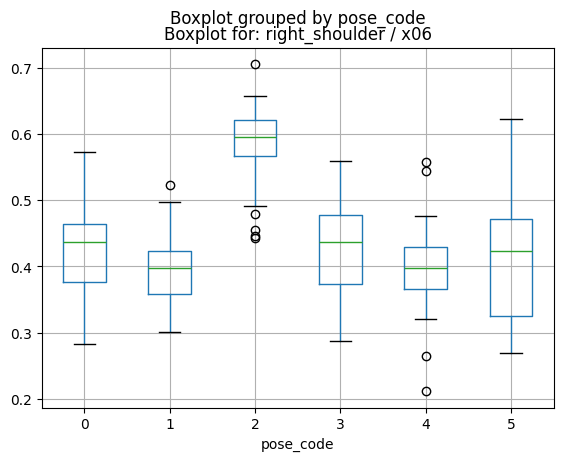

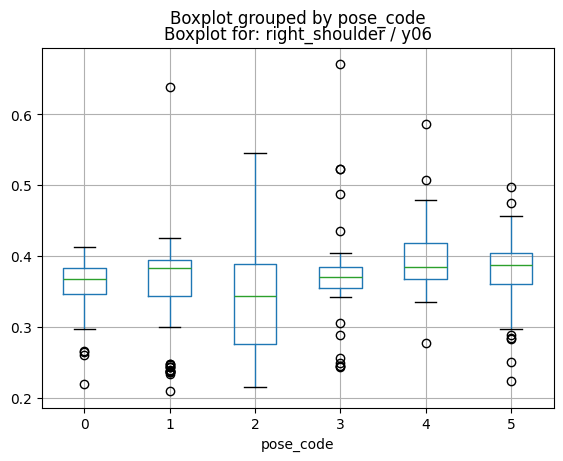

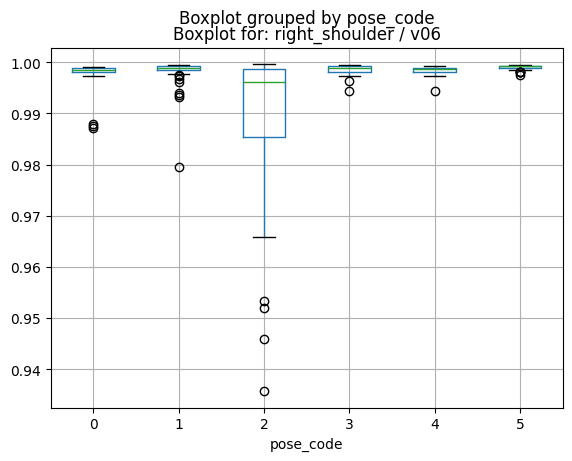

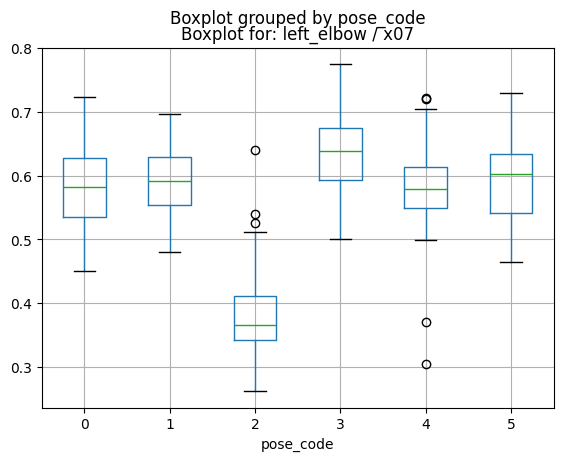

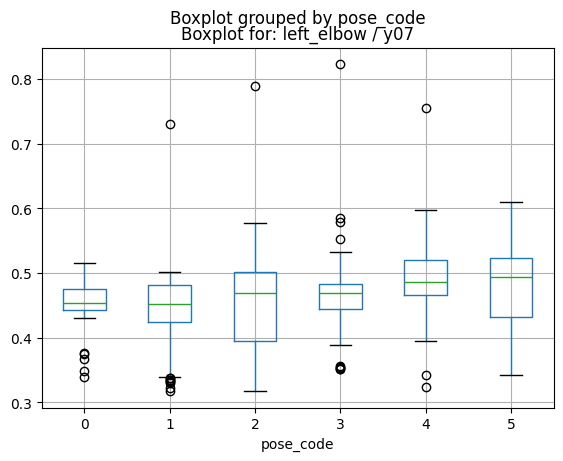

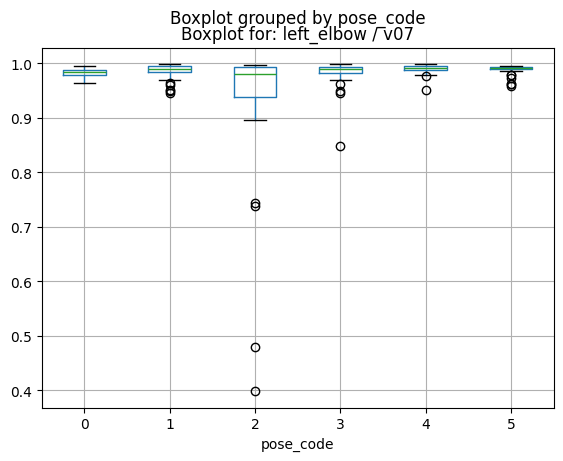

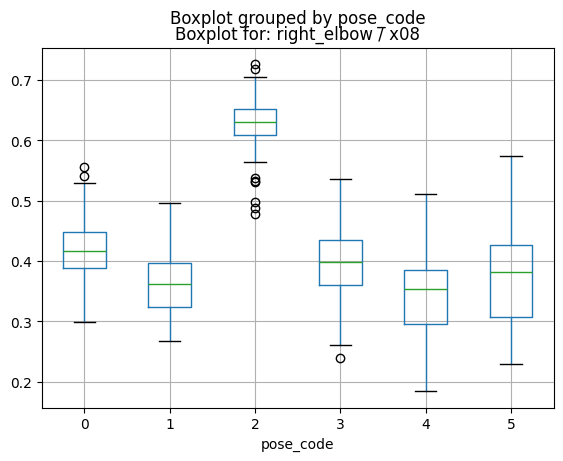

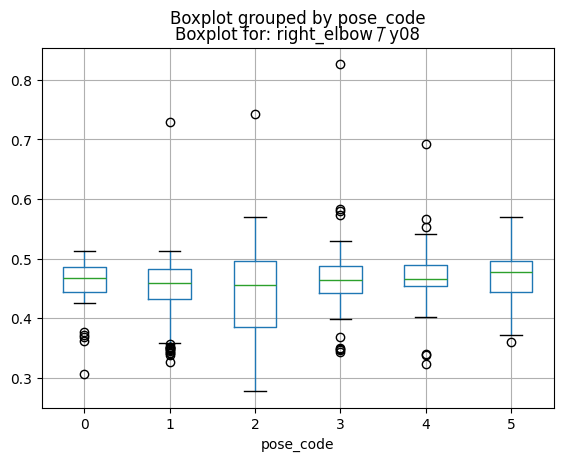

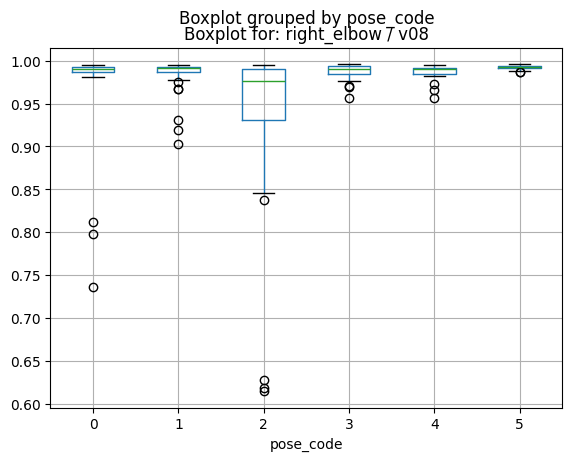

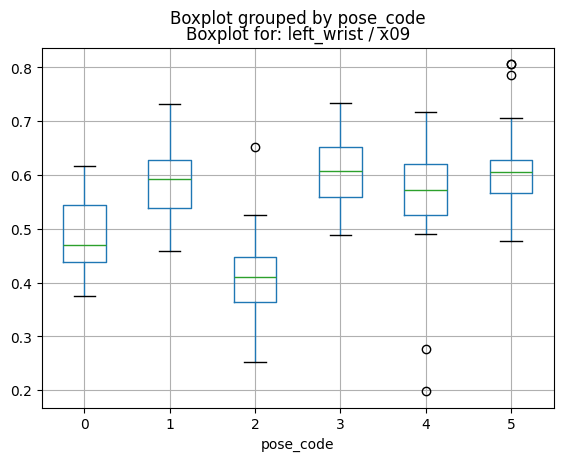

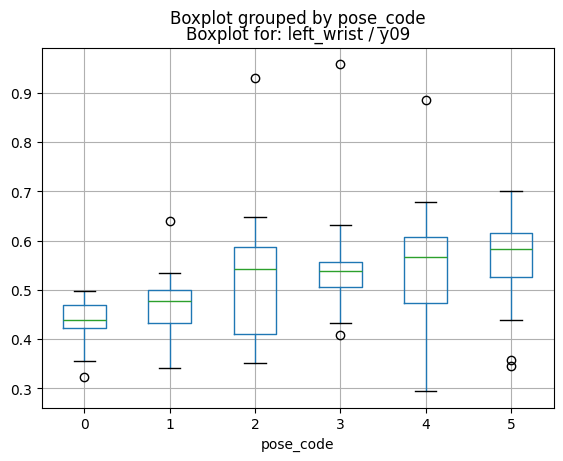

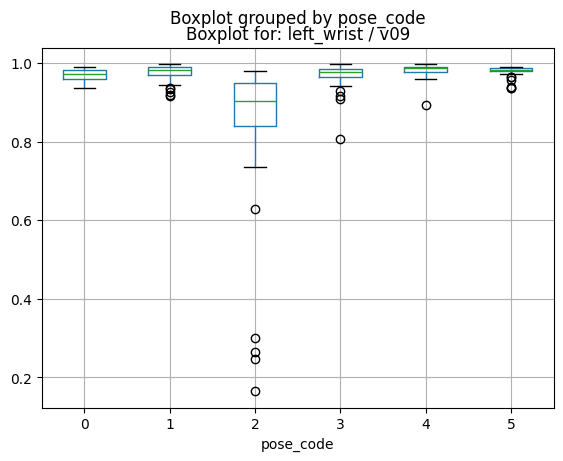

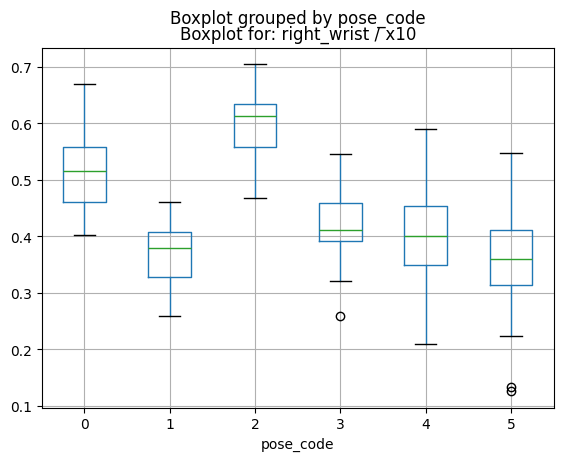

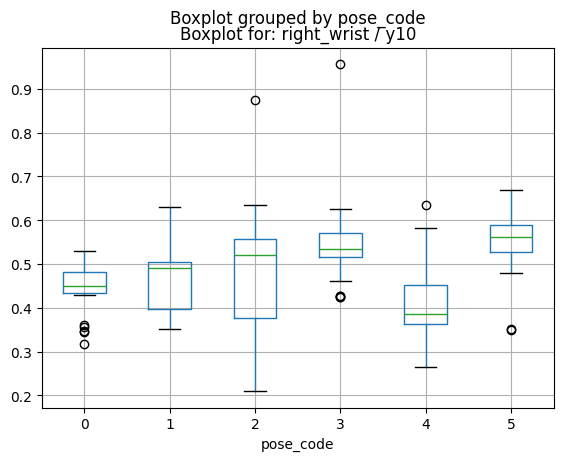

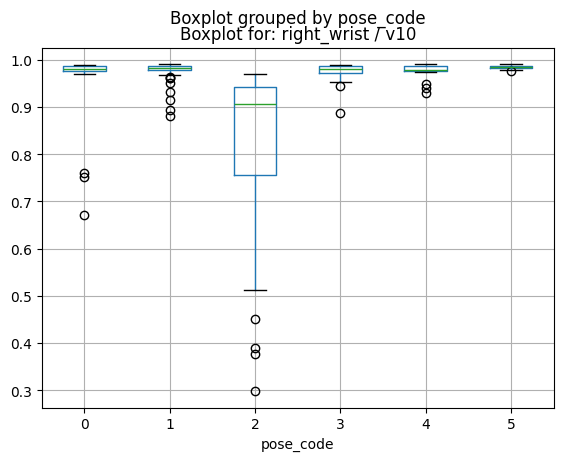

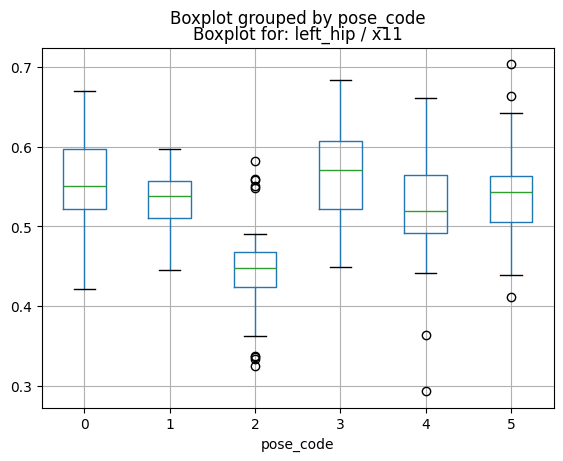

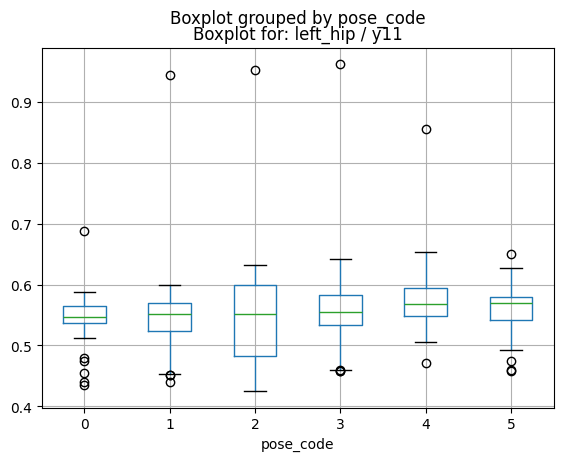

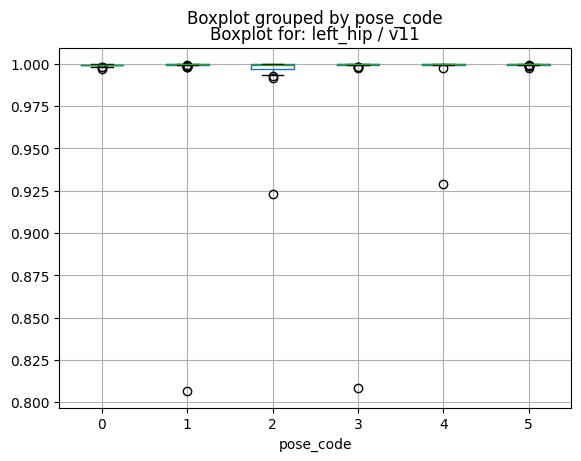

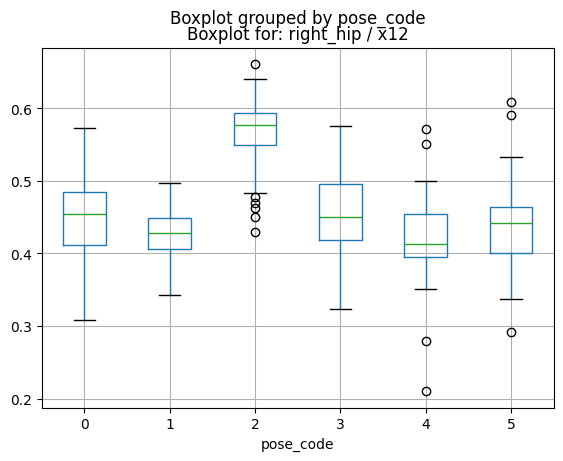

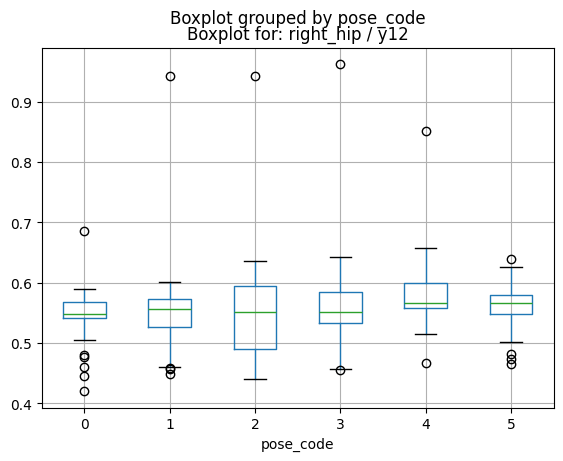

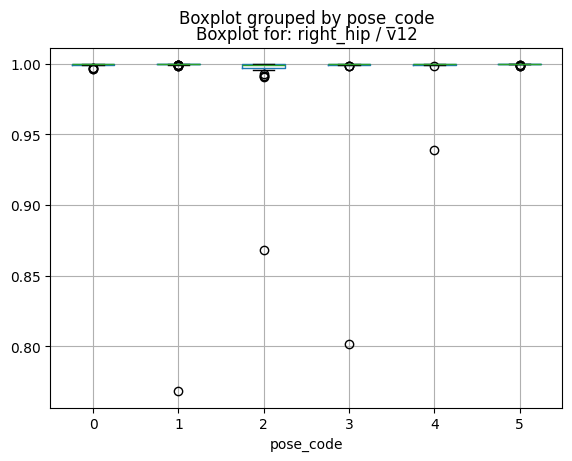

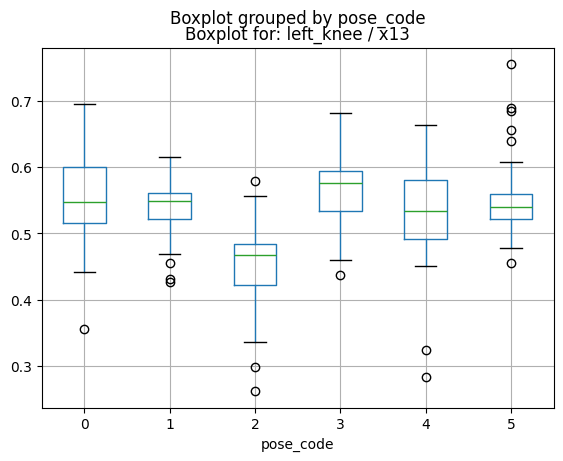

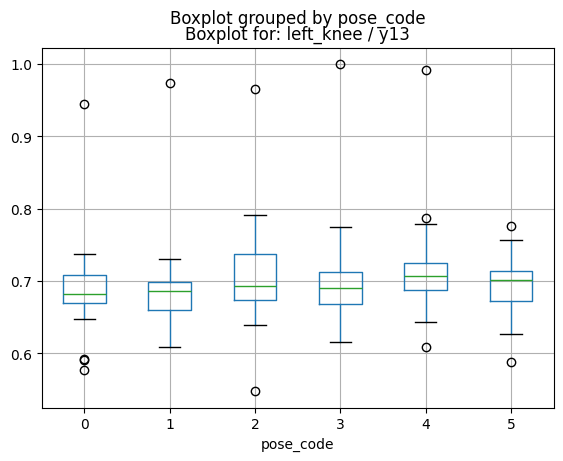

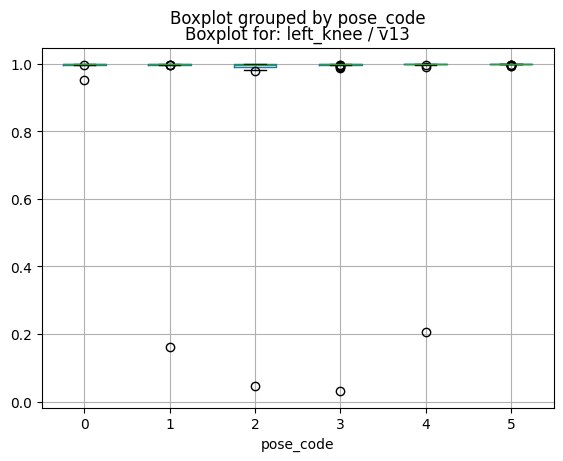

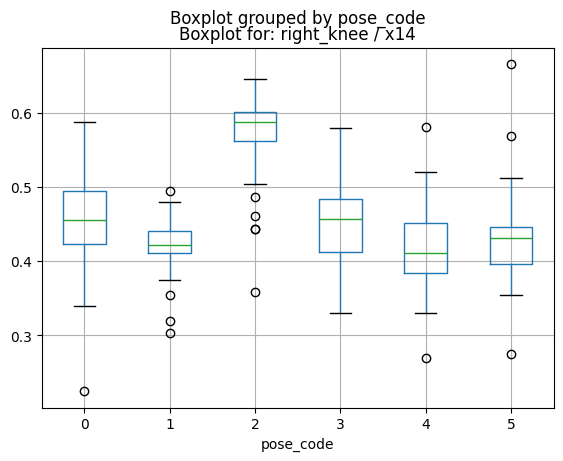

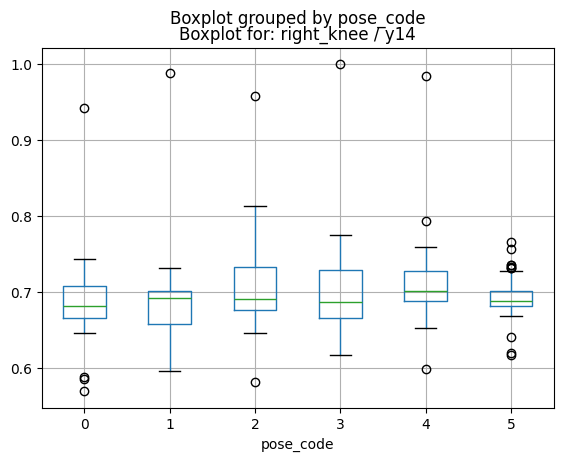

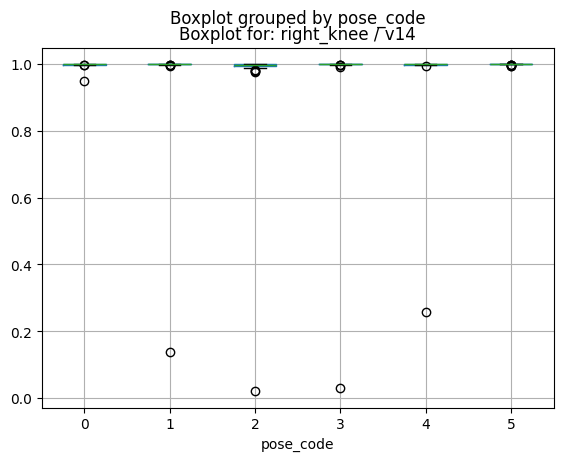

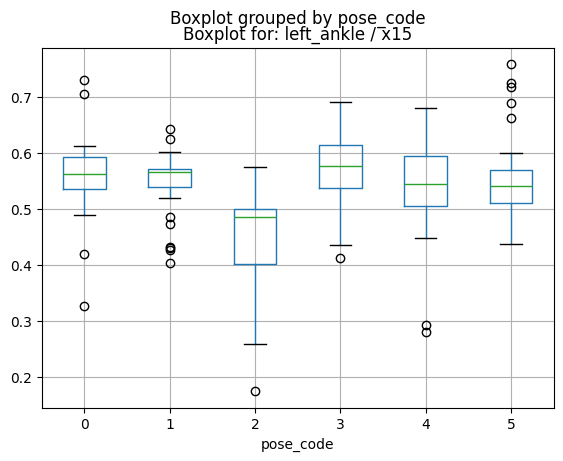

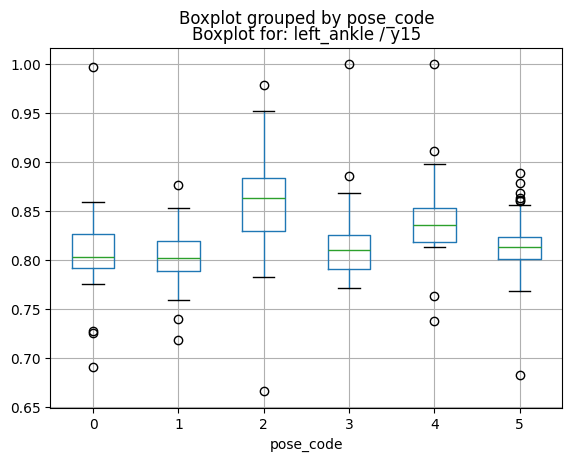

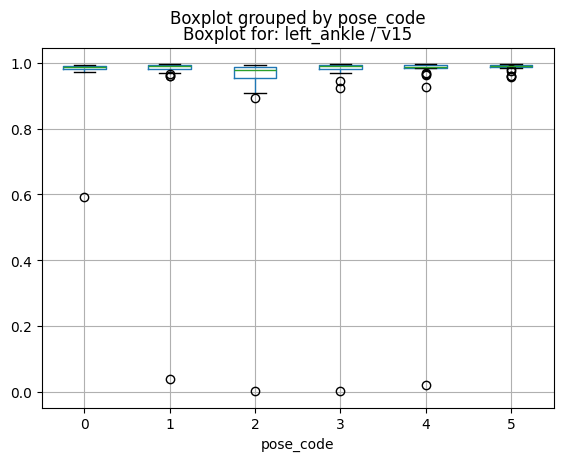

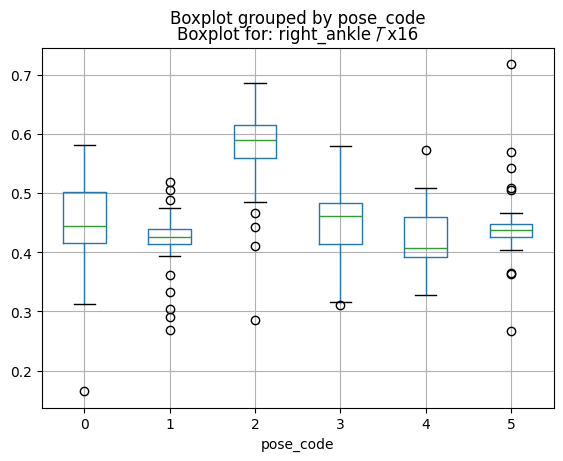

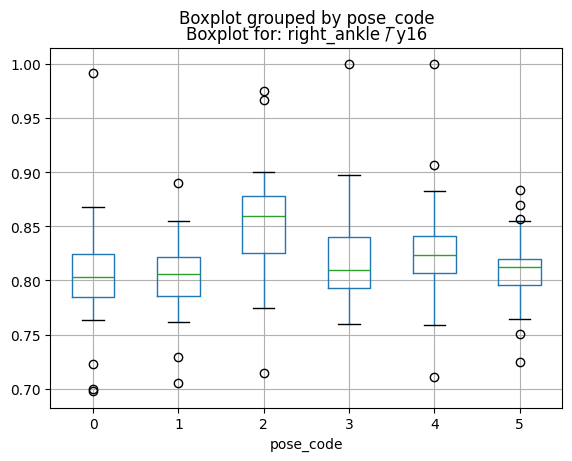

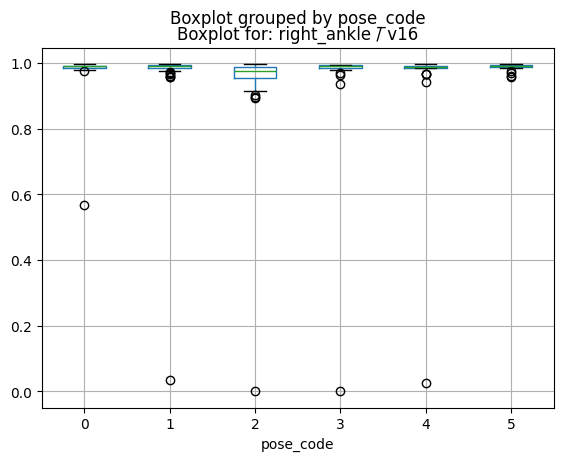

In [23]:
for i in range(0, len(x_coordinates_cols), 1):
    keypoints_train_df.boxplot(column=x_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + x_coordinates_dict[x_coordinates_cols[i]] + ' / ' + x_coordinates_cols[i])
    plt.show()
    keypoints_train_df.boxplot(column=y_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + y_coordinates_dict[y_coordinates_cols[i]] + ' / ' + y_coordinates_cols[i])
    plt.show()
    keypoints_train_df.boxplot(column=conf_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + conf_coordinates_dict[conf_coordinates_cols[i]] + ' / ' + conf_coordinates_cols[i])
    plt.show()

Conclusie: er is veel spreiding. De genormaliseerde keypoints zijn gerelateerd aan de bounding boxes. Dat zorgt voor ruis: de coördinaten van de neus zijn bijvoorbeeld anders wanneer iemand zijn handen boven het hoofd heeft.

Scatterplots om te zien waar bepaalde keypoints zich bevinden: zijn er clusters te vinden?

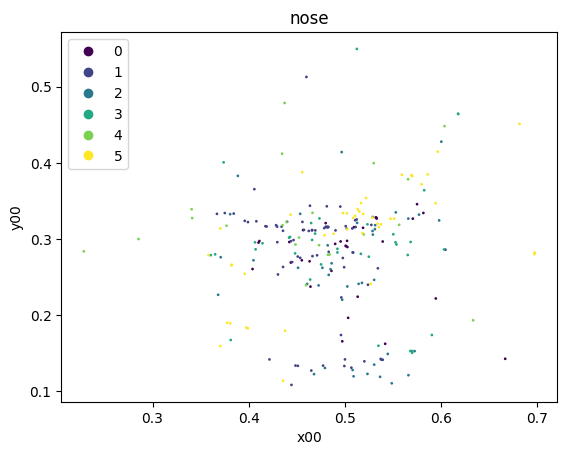

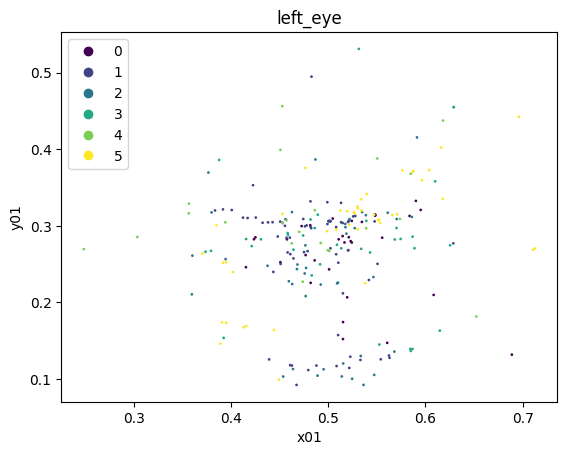

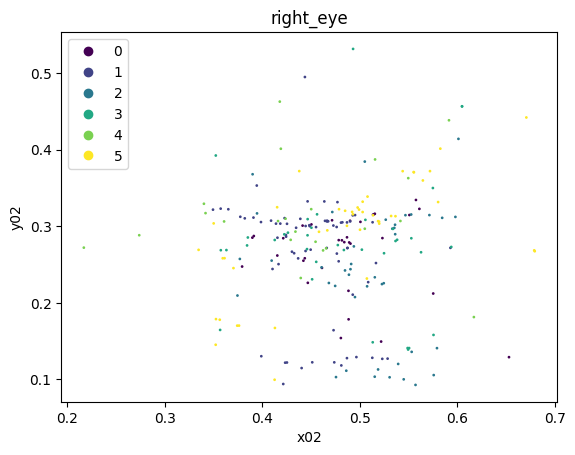

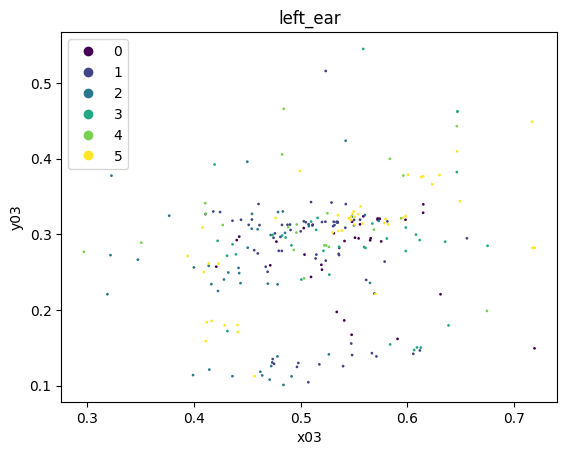

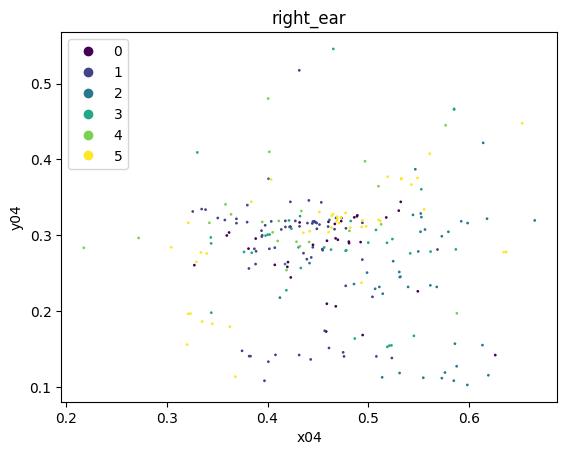

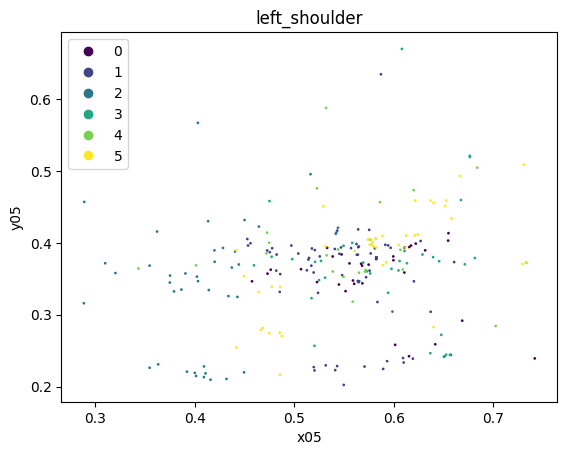

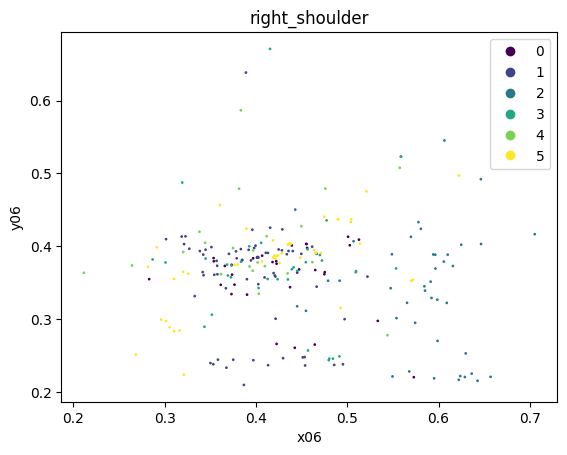

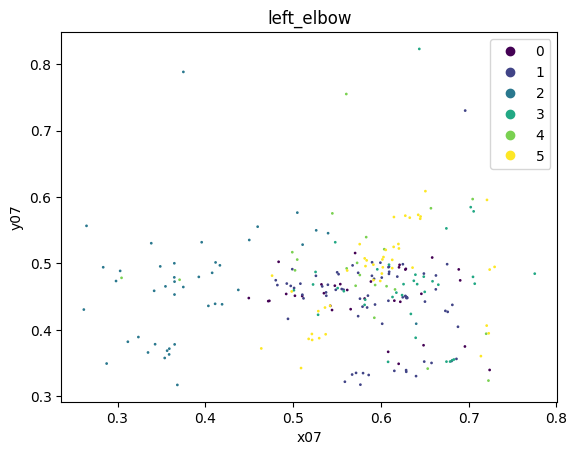

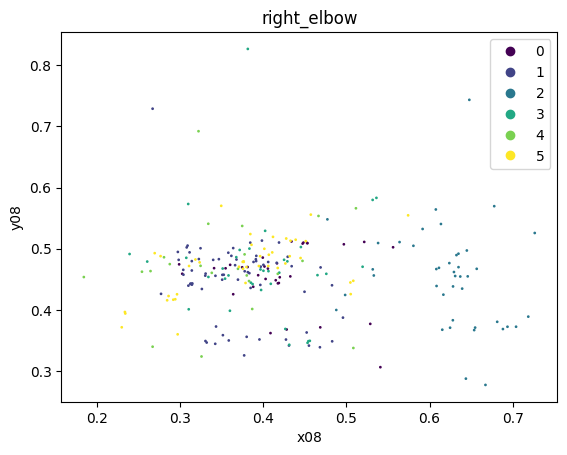

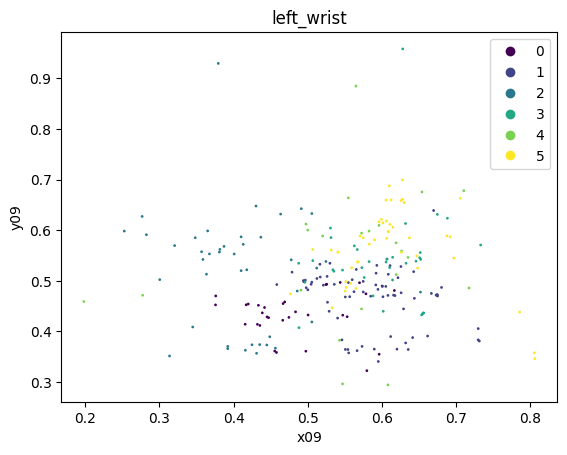

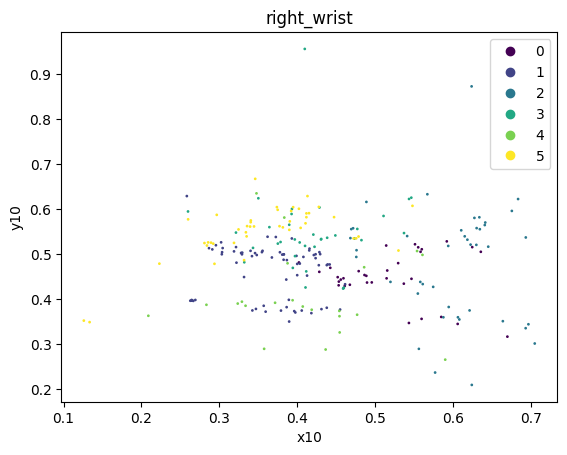

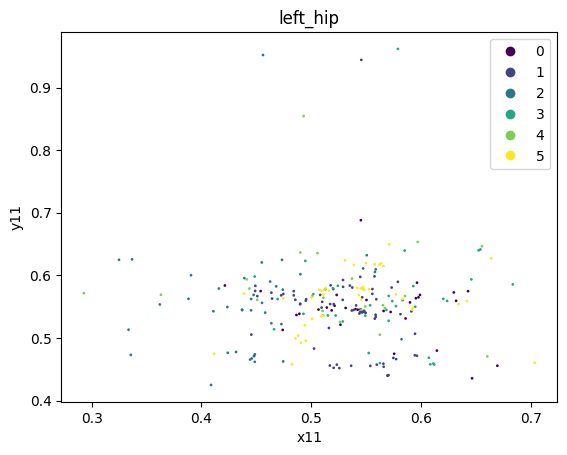

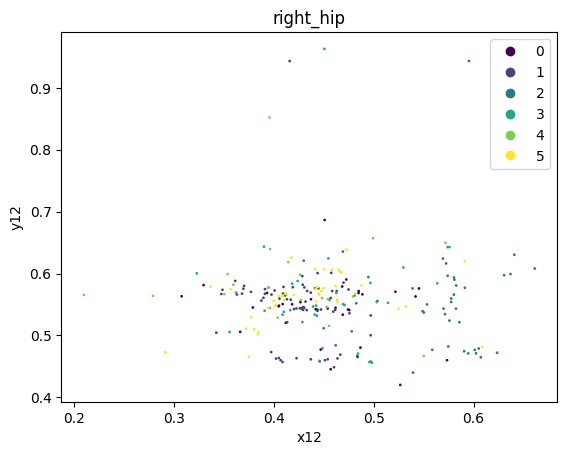

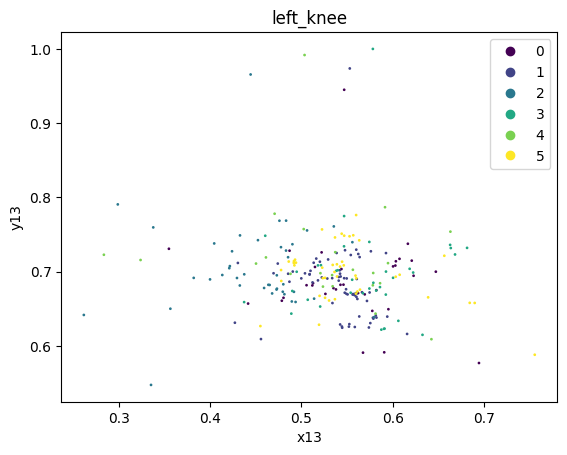

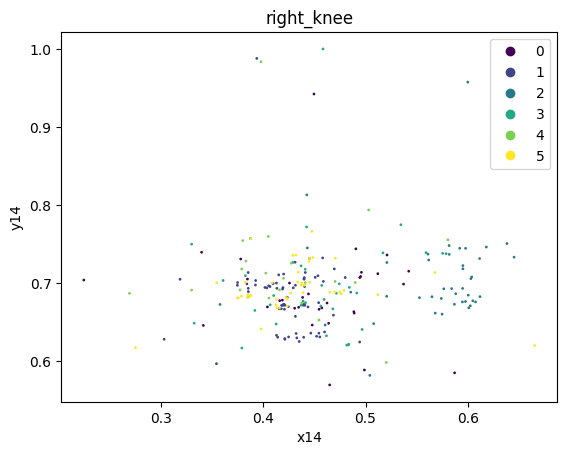

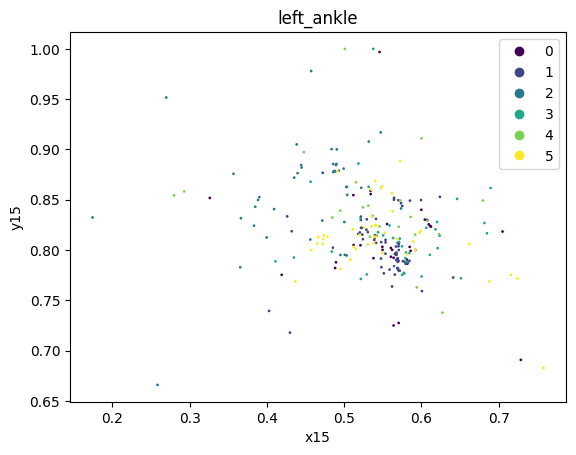

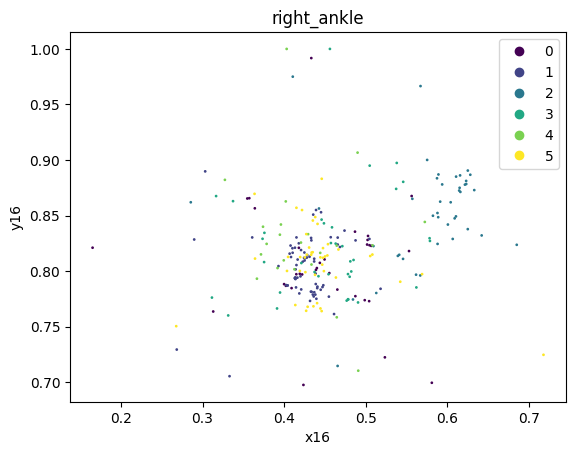

In [24]:
# Alle coördinaten in een scatterplot plaatsen met als kleur de pose en als grootte de confidence

coordinate_number = np.arange(0, 17, 1)

for i in coordinate_number:
    x_values = keypoints_train_df[x_coordinates_cols[i]]
    y_values = keypoints_train_df[y_coordinates_cols[i]]

    figure = plt.figure
    ax = plt.gca()
    scatter = ax.scatter(x_values, y_values, c=keypoints_train_df['pose_code'], s=keypoints_train_df['confidence'])
    ax.set_xlabel(x_coordinates_cols[i])
    ax.set_ylabel(y_coordinates_cols[i])
    ax.set_title("{} vs {}".format(x_coordinates_cols[i], y_coordinates_cols[i]))
    plt.title(x_coordinates_dict[x_coordinates_cols[i]])
    plt.legend(*scatter.legend_elements())
    plt.show()



#### Stap 2. Dataset normaliseren

In plaats van de keypoints te relateren aan de bounding box, gaan we de keypoints relateren aan een vast punt van het lichaam: het midden van de torso. Op deze manier geeft een coördinaat meer informatie over de locatie.

#### Toelichting data
Elke pose bevat 17 coördinaten. De betekenis van elke 'keypoint' is als volgt:
- 0: nose
- 1: left_eye
- 2: right_eye
- 3: left_ear
- 4: right_ear
- 5: left_shoulder
- 6: right_shoulder
- 7: left_elbow
- 8: right_elbow
- 9: left_wrist
- 10: right_wrist
- 11: left_hip
- 12: right_hip
- 13: left_knee
- 14: right_knee
- 15: left_ankle
- 16: right_ankle

In [56]:
# Eerst wordt het torso bepaald

# Hoogste punt torso: laagste waarde van beide schouders
keypoints_train_df['torso_top'] = keypoints_train_df[['y05', 'y06']].min(axis=1)
# Laagste punt torso: hoogste waarde van beide heupen
keypoints_train_df['torso_bottom'] = keypoints_train_df[['y11', 'y12']].max(axis=1)
# Meest linkse punt torso
keypoints_train_df['torso_left'] = keypoints_train_df[['x06', 'x12']].min(axis=1)
# Meest rechtse punt torso
keypoints_train_df['torso_right'] = keypoints_train_df[['x05', 'x11']].max(axis=1)

# Het middelpunt van het torso
keypoints_train_df['torso_center_x'] = keypoints_train_df[['torso_left', 'torso_right']].mean(axis=1)
keypoints_train_df['torso_center_y'] = keypoints_train_df[['torso_bottom', 'torso_top']].mean(axis=1)

# De hoogte van het torso wordt waarde 1, de schaalfactor om te rekenen wordt hier berekend
keypoints_train_df['scale_factor'] = 1 / (keypoints_train_df['torso_bottom'] - keypoints_train_df['torso_top'])

In [61]:
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,y07_norm,y08_norm,y09_norm,y10_norm,y11_norm,y12_norm,y13_norm,y14_norm,y15_norm,y16_norm
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.914894,0.519160,0.314611,0.534587,0.305057,0.500624,0.305733,...,-0.089824,-0.062856,-0.158934,-0.080310,0.495653,0.500000,1.264477,1.253703,1.967561,1.957170
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.909827,0.509721,0.315518,0.524141,0.306418,0.489993,0.307169,...,-0.041827,-0.027412,-0.196156,-0.089003,0.500000,0.491295,1.281880,1.268211,2.011203,1.988737
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.906767,0.503642,0.196350,0.515195,0.174214,0.488498,0.178452,...,-0.000445,-0.011576,-0.051118,0.010714,0.500000,0.495103,1.245496,1.237465,1.396445,1.381261
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.912517,0.497531,0.165511,0.515113,0.152043,0.480580,0.154027,...,-0.003023,0.001724,-0.028848,-0.050966,0.488813,0.500000,1.276832,1.271745,1.989151,1.987445
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.901814,0.542198,0.162231,0.560624,0.147076,0.521831,0.149408,...,0.032868,0.008405,-0.039074,-0.039867,0.497698,0.500000,1.264331,1.259467,1.940902,1.949706


In [60]:
# Hierna moeten alle keypoints genormaliseerd worden
# Alle coördinaten moeten rondom het center van het torso geplaatst worden en geschaald worden

# Loop voor alle x_coordinaten
for i in x_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_train_df[i + '_norm'] = (keypoints_train_df[i] - keypoints_train_df['torso_center_x']) * keypoints_train_df['scale_factor']

# Loop voor alle y_coordinaten
for j in y_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_train_df[j + '_norm'] = (keypoints_train_df[j] - keypoints_train_df['torso_center_y']) * keypoints_train_df['scale_factor']

In [59]:
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,y07_norm,y08_norm,y09_norm,y10_norm,y11_norm,y12_norm,y13_norm,y14_norm,y15_norm,y16_norm
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.914894,0.519160,0.314611,0.534587,0.305057,0.500624,0.305733,...,-0.089824,-0.062856,-0.158934,-0.080310,0.495653,0.500000,1.264477,1.253703,1.967561,1.957170
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.909827,0.509721,0.315518,0.524141,0.306418,0.489993,0.307169,...,-0.041827,-0.027412,-0.196156,-0.089003,0.500000,0.491295,1.281880,1.268211,2.011203,1.988737
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.906767,0.503642,0.196350,0.515195,0.174214,0.488498,0.178452,...,-0.000445,-0.011576,-0.051118,0.010714,0.500000,0.495103,1.245496,1.237465,1.396445,1.381261
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.912517,0.497531,0.165511,0.515113,0.152043,0.480580,0.154027,...,-0.003023,0.001724,-0.028848,-0.050966,0.488813,0.500000,1.276832,1.271745,1.989151,1.987445
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.901814,0.542198,0.162231,0.560624,0.147076,0.521831,0.149408,...,0.032868,0.008405,-0.039074,-0.039867,0.497698,0.500000,1.264331,1.259467,1.940902,1.949706


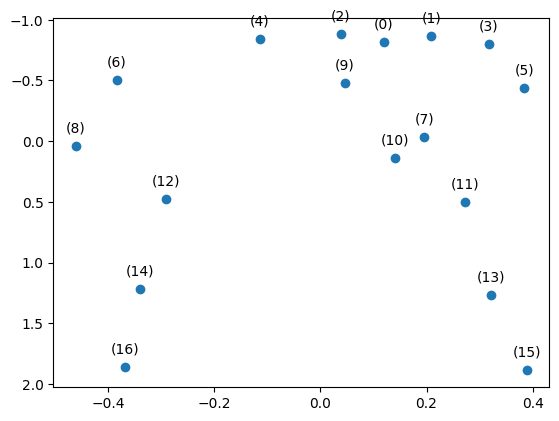

In [63]:
# Toegevoegde columns
x_coordinates_cols_norm = ['x00_norm', 'x01_norm', 'x02_norm', 'x03_norm', 'x04_norm', 'x05_norm','x06_norm', 'x07_norm', 'x08_norm', 'x09_norm', 'x10_norm', 'x11_norm', 'x12_norm', 'x13_norm', 'x14_norm', 'x15_norm', 'x16_norm']
y_coordinates_cols_norm = ['y00_norm', 'y01_norm', 'y02_norm', 'y03_norm', 'y04_norm', 'y05_norm','y06_norm', 'y07_norm', 'y08_norm', 'y09_norm', 'y10_norm', 'y11_norm', 'y12_norm', 'y13_norm', 'y14_norm', 'y15_norm', 'y16_norm']

# Visualisatie van de keypoints
row = 200

coordinate_number = np.arange(0, 17, 1)

x_coordinates = np.zeros(17)
counter = 0
for x in x_coordinates_cols_norm:
    x_coordinates[counter] = keypoints_train_df.iloc[row][x]
    counter += 1
x_coordinates

y_coordinates = np.zeros(17)
counter = 0
for y in y_coordinates_cols_norm:
    y_coordinates[counter] = keypoints_train_df.iloc[row][y]
    counter += 1
y_coordinates

plt.scatter(x_coordinates, y_coordinates)

for x,y,z in zip(x_coordinates, y_coordinates, coordinate_number):

    label = f"({z})"
    plt.gca().invert_yaxis()
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

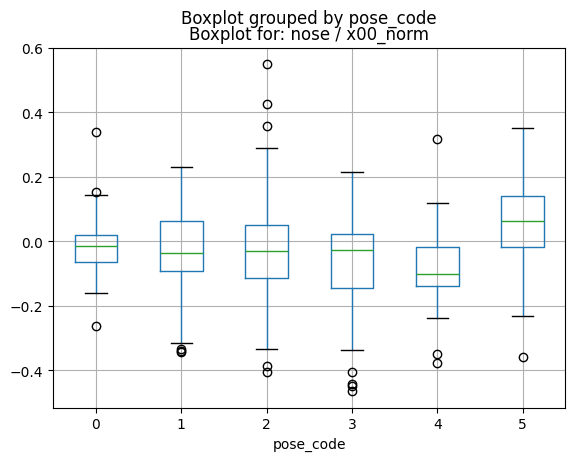

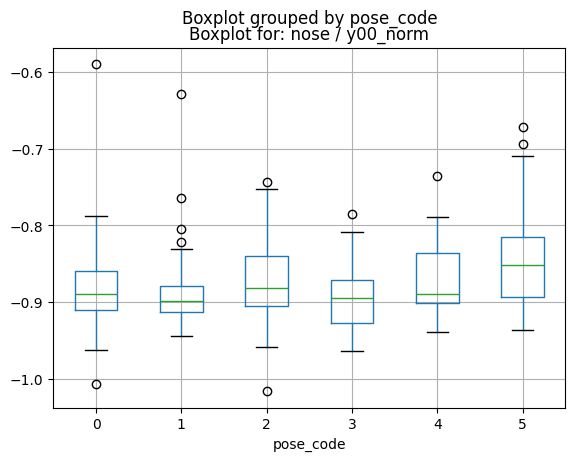

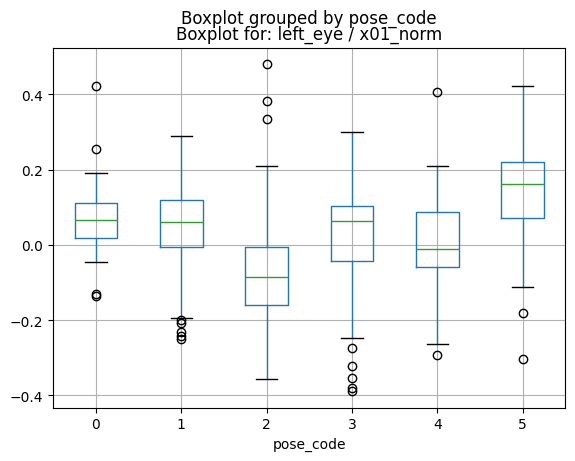

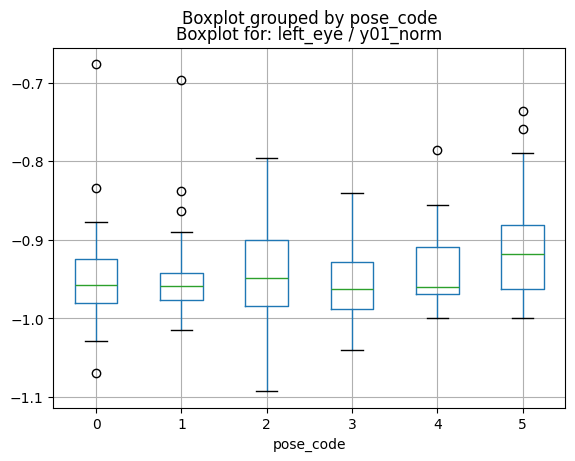

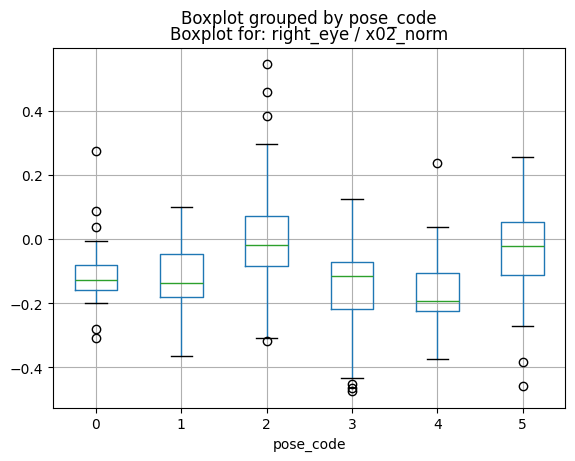

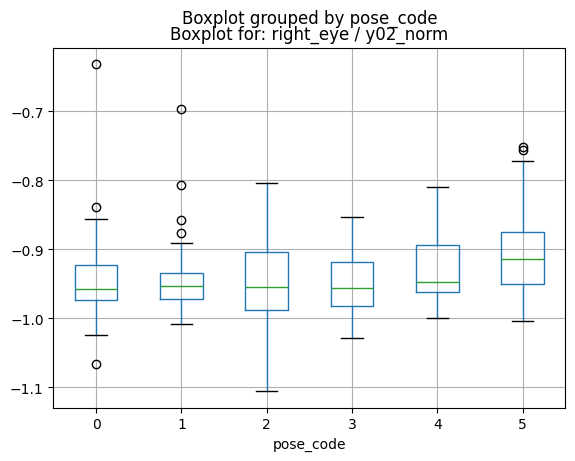

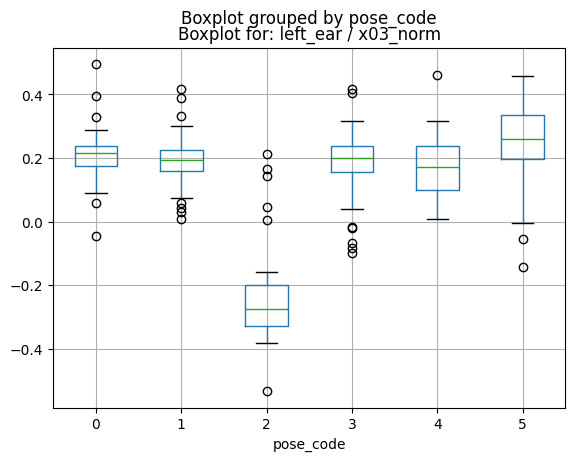

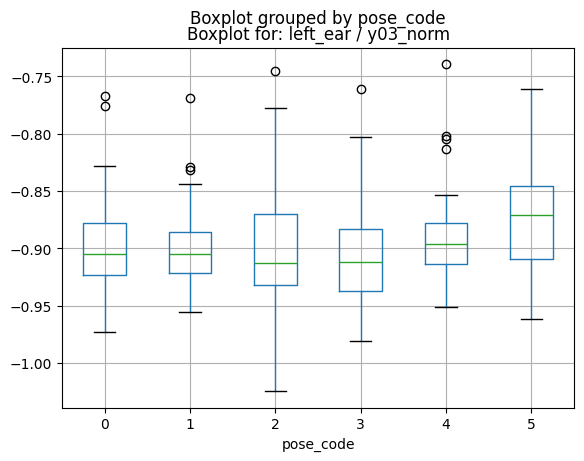

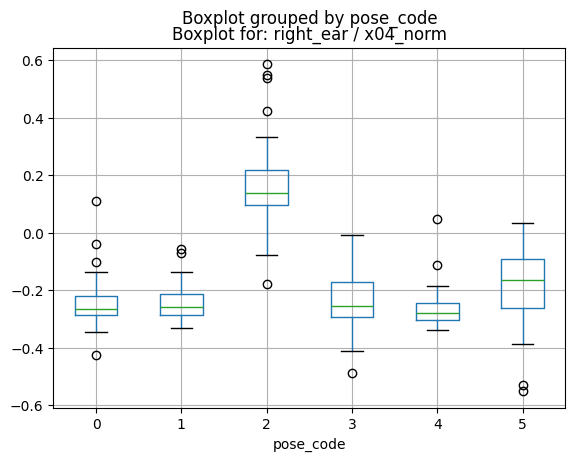

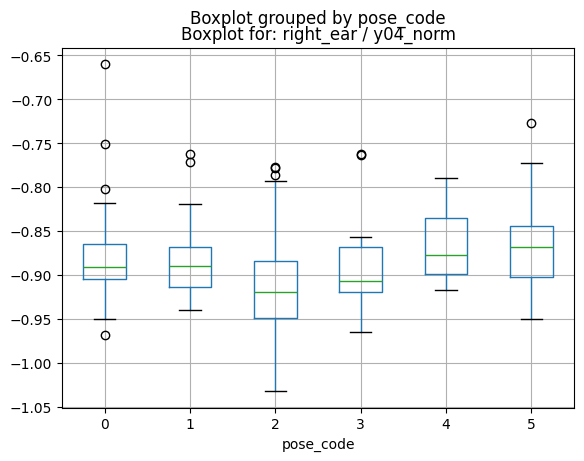

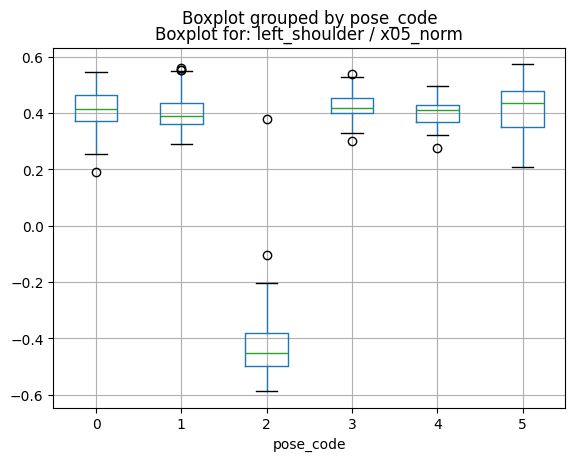

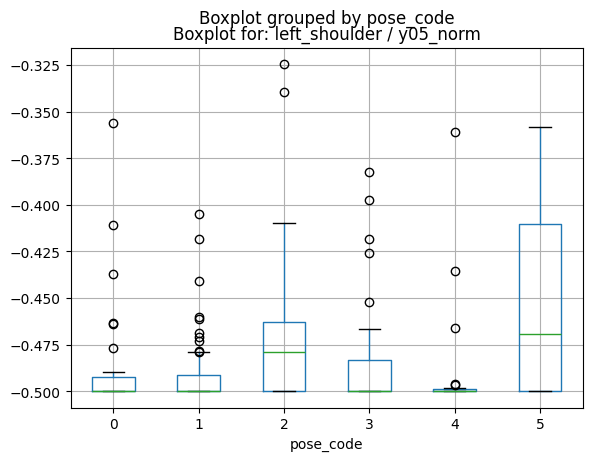

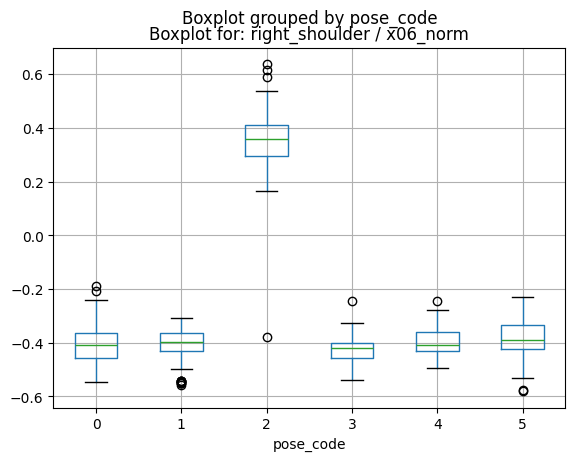

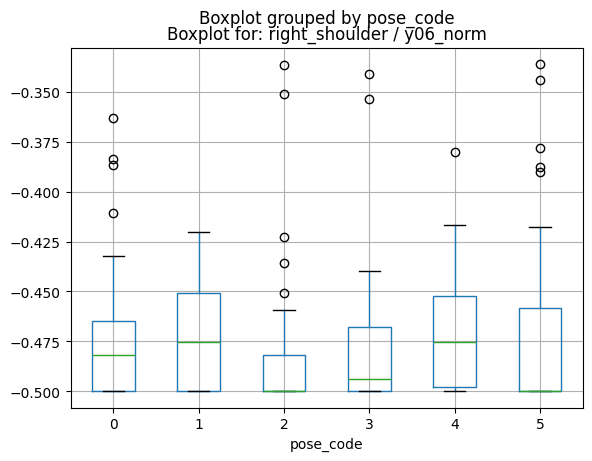

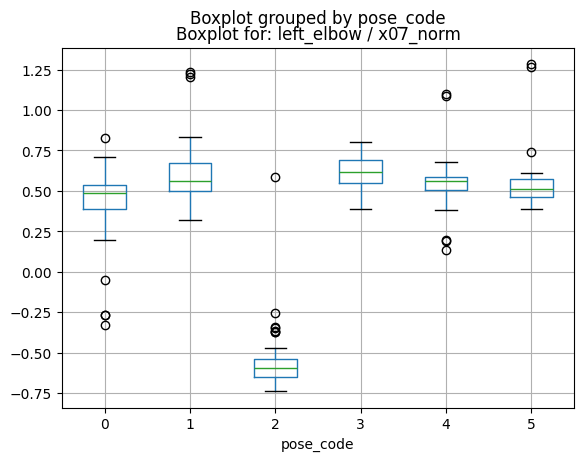

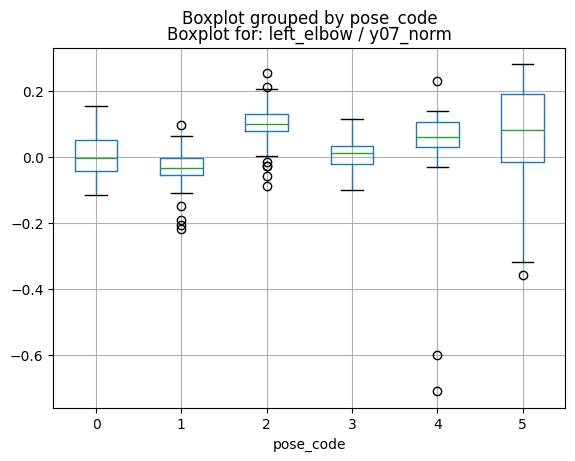

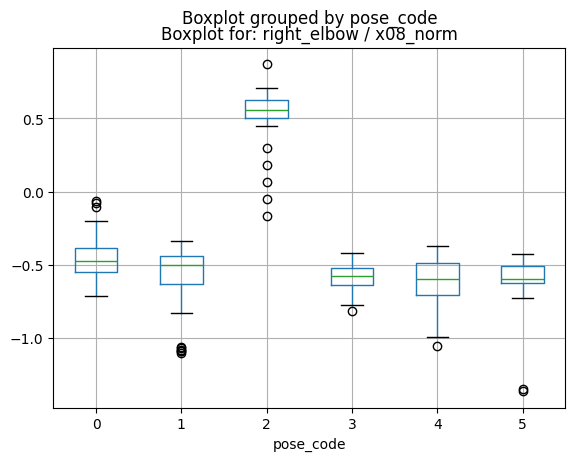

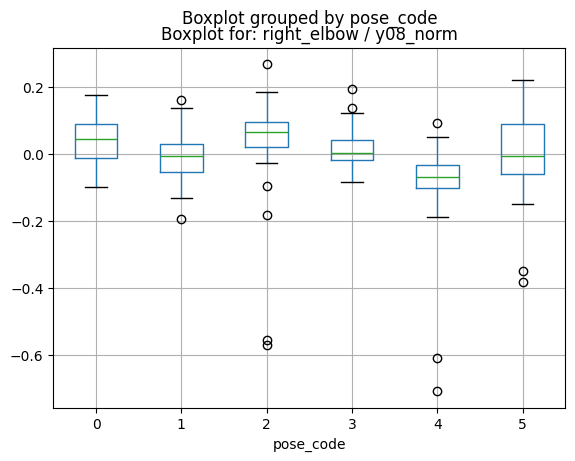

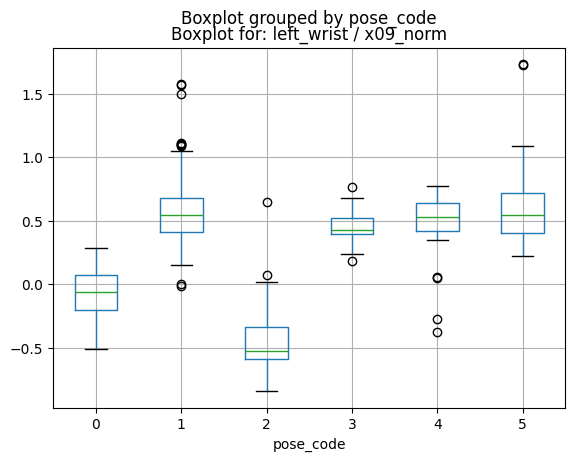

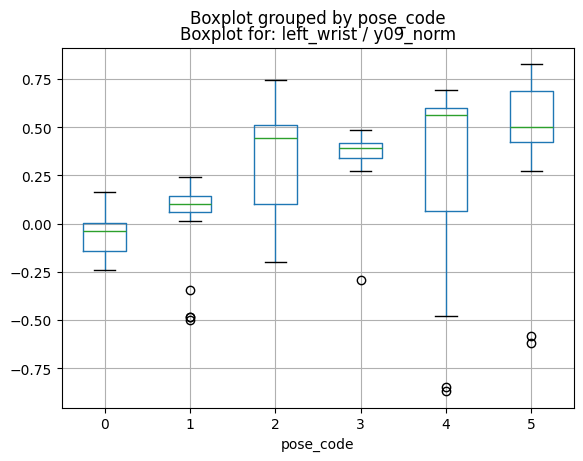

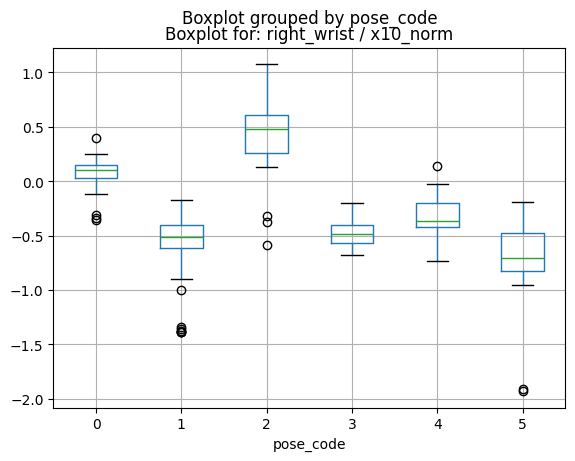

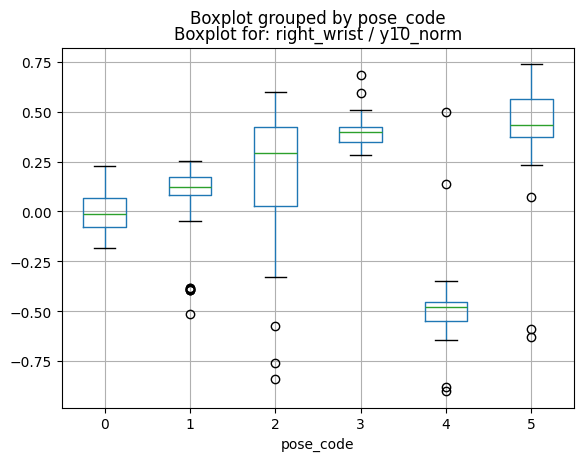

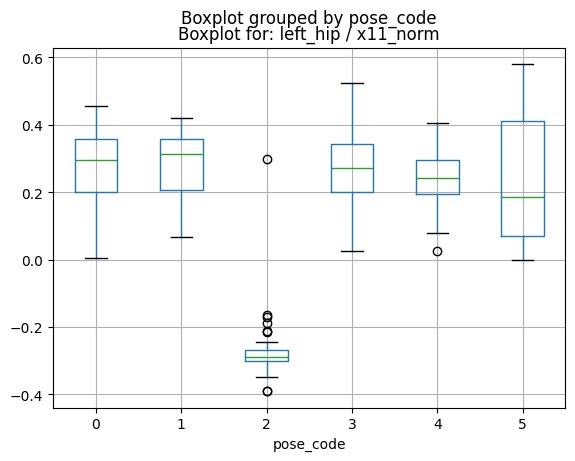

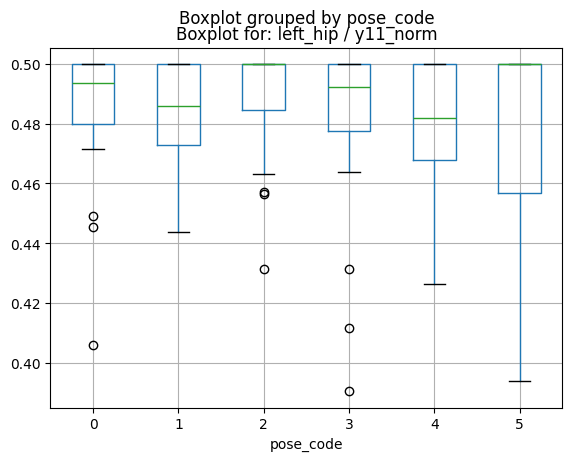

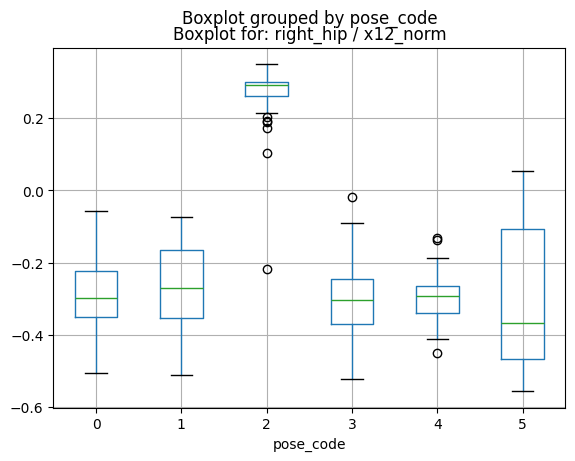

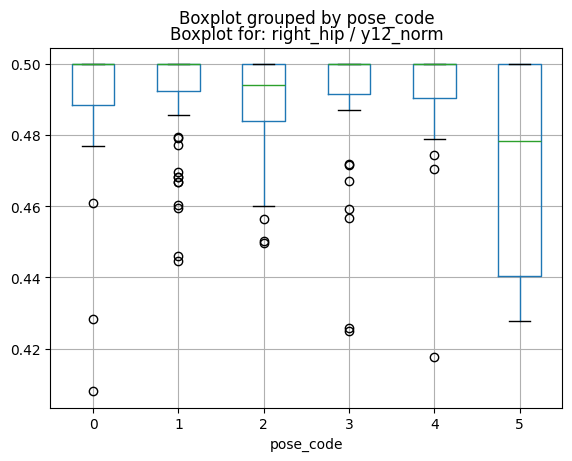

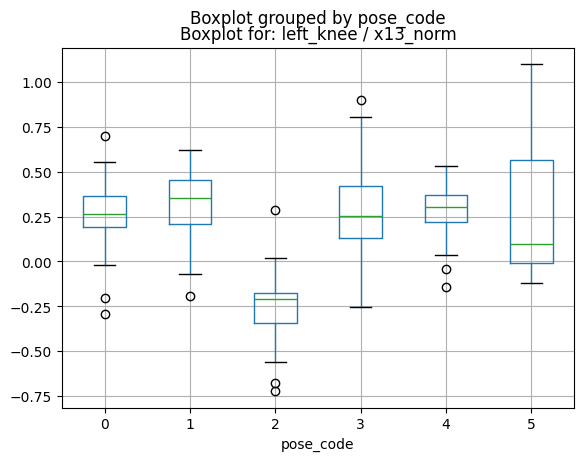

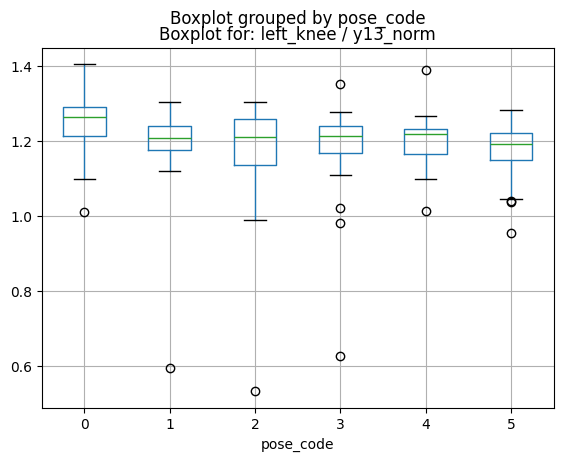

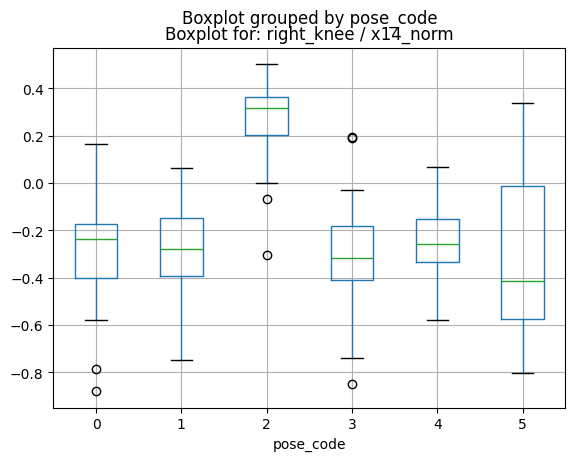

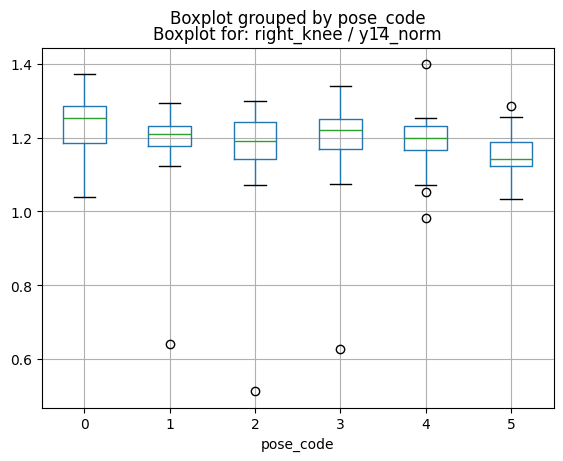

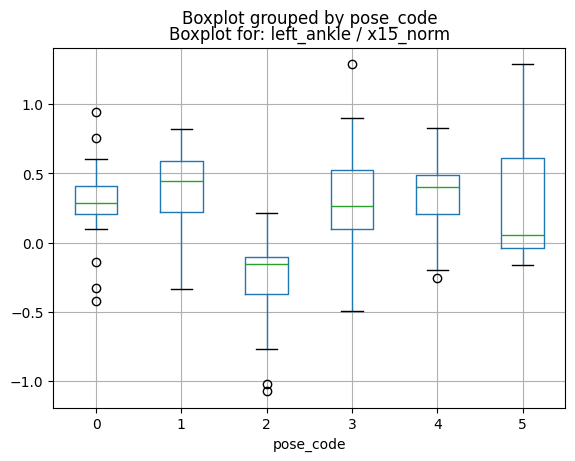

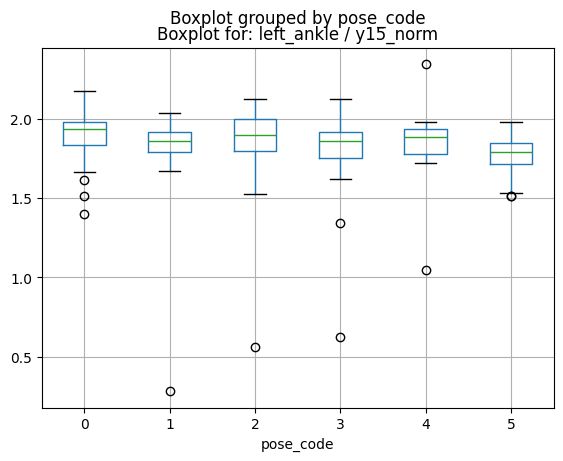

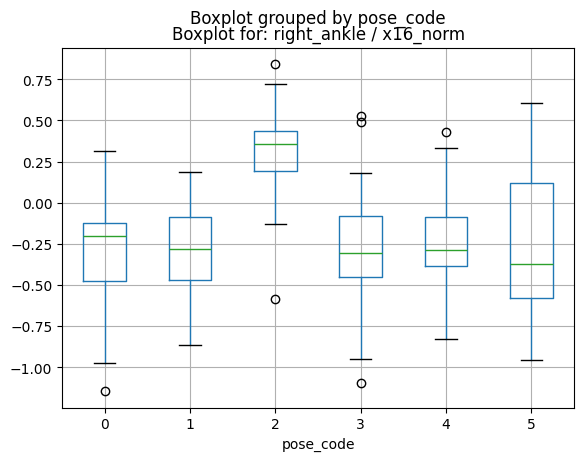

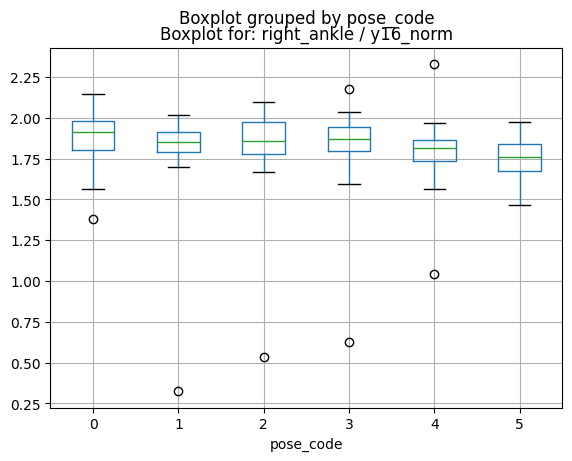

In [67]:
for i in range(0, len(x_coordinates_cols_norm), 1):
    keypoints_train_df.boxplot(column=x_coordinates_cols_norm[i], by='pose_code')
    plt.title('Boxplot for: ' + x_coordinates_dict[x_coordinates_cols[i]] + ' / ' + x_coordinates_cols_norm[i])
    plt.show()
    keypoints_train_df.boxplot(column=y_coordinates_cols_norm[i], by='pose_code')
    plt.title('Boxplot for: ' + y_coordinates_dict[y_coordinates_cols[i]] + ' / ' + y_coordinates_cols_norm[i])
    plt.show()

#### Stap 3. Dataset verrijken



### Additionele data

0. crossed_arms
  - A. Horizontale afstand tussen polsen (positief of negatief)
1. delivered_gestures
  - B. Absolute afstand tussen polsen onderling
3. hands_in_pockets
  - C. en D. Absolute afstand tussen polsen en heupen
4. hands_touching_face
  - E. en F. Absolute afstand tussen polsen en neus
5. standing_with_the_bodyweight_on_one_leg
  - G. Verticale afstand tussen heupen


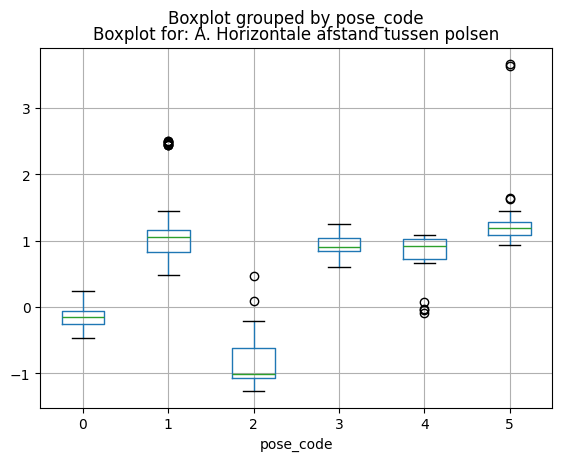

In [83]:
# A. Horizontale afstand tussen polsen (positief of negatief)
keypoints_train_df['A'] = keypoints_train_df['x09_norm'] - keypoints_train_df['x10_norm']

keypoints_train_df.boxplot('A', by='pose_code')
plt.title('Boxplot for: A. Horizontale afstand tussen polsen')
plt.show()

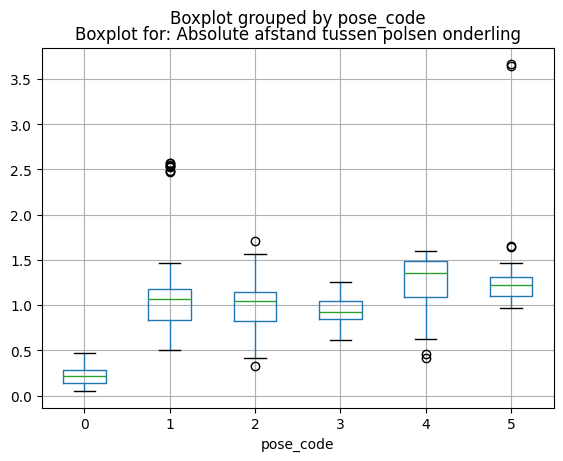

In [84]:
# B. Absolute afstand tussen polsen onderling
keypoints_train_df['B'] = np.sqrt(pow(keypoints_train_df['x09_norm'] - keypoints_train_df['x10_norm'], 2) +
                                pow(keypoints_train_df['y09_norm'] - keypoints_train_df['y10_norm'], 2))

keypoints_train_df.boxplot('B', by='pose_code')
plt.title('Boxplot for: Absolute afstand tussen polsen onderling')
plt.show()

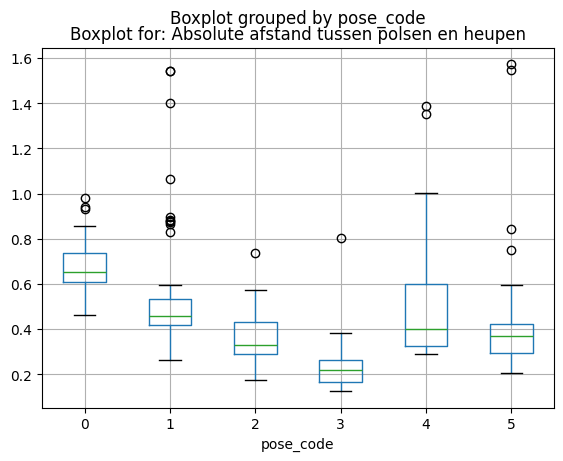

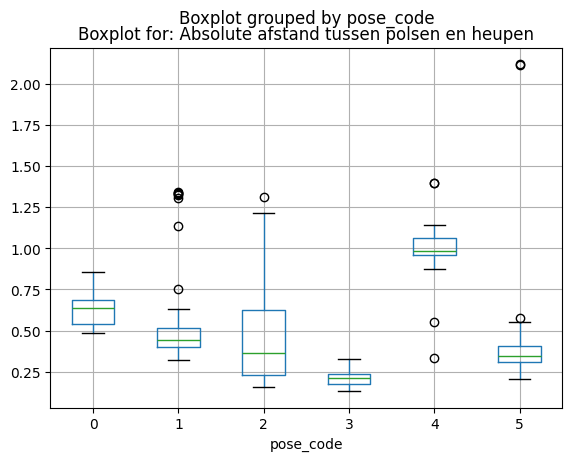

In [85]:
# C. en D. Absolute afstand tussen polsen en heupen
keypoints_train_df['C'] = np.sqrt(pow(keypoints_train_df['x09_norm'] - keypoints_train_df['x11_norm'], 2) +
                                pow(keypoints_train_df['y09_norm'] - keypoints_train_df['y11_norm'], 2))

keypoints_train_df.boxplot('C', by='pose_code')
plt.title('Boxplot for: Absolute afstand tussen polsen en heupen')
plt.show()

keypoints_train_df['D'] = np.sqrt(pow(keypoints_train_df['x10_norm'] - keypoints_train_df['x12_norm'], 2) +
                                pow(keypoints_train_df['y10_norm'] - keypoints_train_df['y12_norm'], 2))

keypoints_train_df.boxplot('D', by='pose_code')
plt.title('Boxplot for: Absolute afstand tussen polsen en heupen')
plt.show()

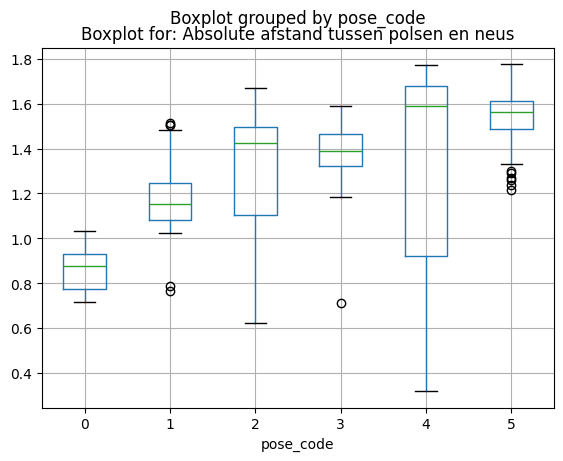

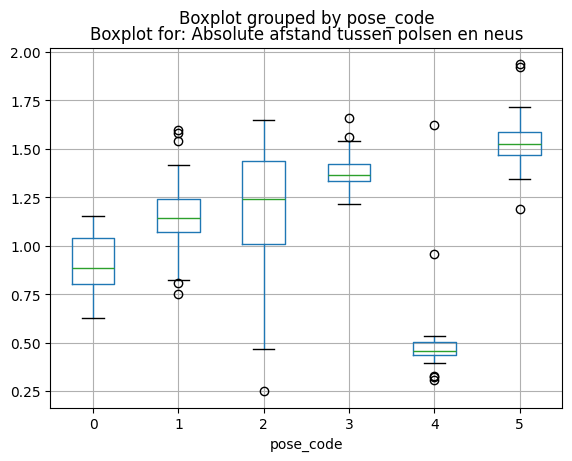

In [86]:
# E. en F. Absolute afstand tussen polsen en neus
keypoints_train_df['E'] = np.sqrt(pow(keypoints_train_df['x09_norm'] - keypoints_train_df['x00_norm'], 2) +
                                pow(keypoints_train_df['y09_norm'] - keypoints_train_df['y00_norm'], 2))

keypoints_train_df.boxplot('E', by='pose_code')
plt.title('Boxplot for: Absolute afstand tussen polsen en neus')
plt.show()

keypoints_train_df['F'] = np.sqrt(pow(keypoints_train_df['x10_norm'] - keypoints_train_df['x00_norm'], 2) +
                                pow(keypoints_train_df['y10_norm'] - keypoints_train_df['y00_norm'], 2))

keypoints_train_df.boxplot('F', by='pose_code')
plt.title('Boxplot for: Absolute afstand tussen polsen en neus')
plt.show()

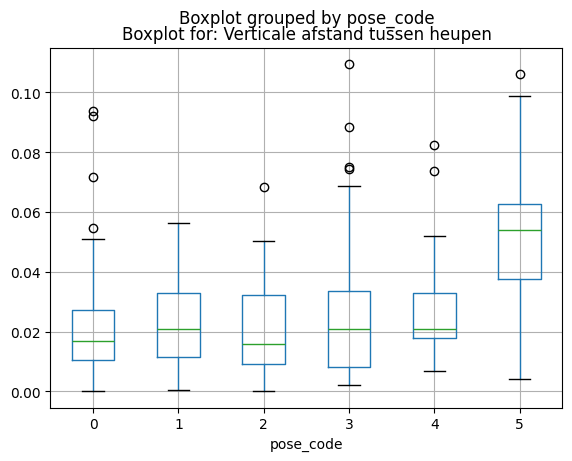

In [87]:
# G. Verticale afstand tussen heupen
keypoints_train_df['G'] = abs(keypoints_train_df['y11_norm'] - keypoints_train_df['y12_norm'])

keypoints_train_df.boxplot('G', by='pose_code')
plt.title('Boxplot for: Verticale afstand tussen heupen')
plt.show()

In [79]:
keypoints_train_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,y14_norm,y15_norm,y16_norm,A,B,C,D,E,F,G
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.914894,0.519160,0.314611,0.534587,0.305057,0.500624,0.305733,...,1.253703,1.967561,1.957170,-0.046269,0.048084,0.130580,0.142530,0.119381,0.133884,0.000724
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.909827,0.509721,0.315518,0.524141,0.306418,0.489993,0.307169,...,1.268211,2.011203,1.988737,0.038330,0.042155,0.114718,0.118669,0.121605,0.131226,0.001425
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.906767,0.503642,0.196350,0.515195,0.174214,0.488498,0.178452,...,1.237465,1.396445,1.381261,-0.019473,0.028860,0.196462,0.178505,0.302092,0.323441,0.001687
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.912517,0.497531,0.165511,0.515113,0.152043,0.480580,0.154027,...,1.271745,1.989151,1.987445,-0.104283,0.104395,0.165240,0.165124,0.200291,0.200864,0.002450
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.901814,0.542198,0.162231,0.560624,0.147076,0.521831,0.149408,...,1.259467,1.940902,1.949706,-0.087538,0.087538,0.166848,0.154685,0.203712,0.203129,0.000509


### Test aanvullen

In [88]:
keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8m.csv', index_col=0)
#keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8n.csv', index_col=0)
eypoints_test_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.918626,0.480748,0.071525,0.510249,0.057365,0.456121,0.057642,...,0.989005,0.973793,0.972899,0.945782,0.997850,0.997059,0.987376,0.982688,0.872321,0.855474
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.925017,0.505474,0.135134,0.528415,0.119128,0.484709,0.119614,...,0.988110,0.992781,0.982369,0.986851,0.999269,0.999446,0.996309,0.997221,0.954339,0.962987
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.916279,0.494083,0.177466,0.519363,0.160807,0.468841,0.162995,...,0.809691,0.992770,0.773207,0.981191,0.996902,0.999209,0.995648,0.999224,0.981445,0.995079
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.891760,0.482926,0.127723,0.505874,0.116070,0.467202,0.114994,...,0.993857,0.988491,0.987721,0.980461,0.999520,0.999549,0.997878,0.998043,0.971808,0.973816
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.923414,0.490134,0.242953,0.502809,0.218792,0.476563,0.216520,...,0.989556,0.980620,0.982071,0.973322,0.995706,0.995004,0.914793,0.897408,0.420507,0.362834


In [90]:
# Eerst wordt het torso bepaald

# Hoogste punt torso: laagste waarde van beide schouders
keypoints_test_df['torso_top'] = keypoints_test_df[['y05', 'y06']].min(axis=1)
# Laagste punt torso: hoogste waarde van beide heupen
keypoints_test_df['torso_bottom'] = keypoints_test_df[['y11', 'y12']].max(axis=1)
# Meest linkse punt torso
keypoints_test_df['torso_left'] = keypoints_test_df[['x06', 'x12']].min(axis=1)
# Meest rechtse punt torso
keypoints_test_df['torso_right'] = keypoints_test_df[['x05', 'x11']].max(axis=1)

# Het middelpunt van het torso
keypoints_test_df['torso_center_x'] = keypoints_test_df[['torso_left', 'torso_right']].mean(axis=1)
keypoints_test_df['torso_center_y'] = keypoints_test_df[['torso_bottom', 'torso_top']].mean(axis=1)

# De hoogte van het torso wordt waarde 1, de schaalfactor om te rekenen wordt hier berekend
keypoints_test_df['scale_factor'] = 1 / (keypoints_test_df['torso_bottom'] - keypoints_test_df['torso_top'])

In [91]:
# Hierna moeten alle keypoints genormaliseerd worden
# Alle coördinaten moeten rondom het center van het torso geplaatst worden en geschaald worden

# Loop voor alle x_coordinaten
for i in x_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_test_df[i + '_norm'] = (keypoints_test_df[i] - keypoints_test_df['torso_center_x']) * keypoints_test_df['scale_factor']

# Loop voor alle y_coordinaten
for j in y_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_test_df[j + '_norm'] = (keypoints_test_df[j] - keypoints_test_df['torso_center_y']) * keypoints_test_df['scale_factor']

In [92]:
keypoints_test_df['A'] = keypoints_test_df['x09_norm'] - keypoints_test_df['x10_norm']
keypoints_test_df['B'] = np.sqrt(pow(keypoints_test_df['x09_norm'] - keypoints_test_df['x10_norm'], 2) +
                                pow(keypoints_test_df['y09_norm'] - keypoints_test_df['y10_norm'], 2))
keypoints_test_df['C'] = np.sqrt(pow(keypoints_test_df['x09_norm'] - keypoints_test_df['x11_norm'], 2) +
                                pow(keypoints_test_df['y09_norm'] - keypoints_test_df['y11_norm'], 2))
keypoints_test_df['D'] = np.sqrt(pow(keypoints_test_df['x10_norm'] - keypoints_test_df['x12_norm'], 2) +
                                pow(keypoints_test_df['y10_norm'] - keypoints_test_df['y12_norm'], 2))
keypoints_test_df['E'] = np.sqrt(pow(keypoints_test_df['x09_norm'] - keypoints_test_df['x00_norm'], 2) +
                                pow(keypoints_test_df['y09_norm'] - keypoints_test_df['y00_norm'], 2))
keypoints_test_df['F'] = np.sqrt(pow(keypoints_test_df['x10_norm'] - keypoints_test_df['x00_norm'], 2) +
                                pow(keypoints_test_df['y10_norm'] - keypoints_test_df['y00_norm'], 2))
keypoints_test_df['G'] = abs(keypoints_test_df['y11_norm'] - keypoints_test_df['y12_norm'])
keypoints_test_df.head()

,path,pose,pose_code,confidence,x00,y00,x01,y01,x02,y02,...,y14_norm,y15_norm,y16_norm,A,B,C,D,E,F,G
0,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.918626,0.480748,0.071525,0.510249,0.057365,0.456121,0.057642,...,1.283593,2.073510,2.000172,-0.290647,0.301978,0.898107,0.415716,1.047857,1.037230,0.002292
1,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.925017,0.505474,0.135134,0.528415,0.119128,0.484709,0.119614,...,1.265570,2.014448,2.002834,-0.452347,0.464081,0.773844,0.682096,0.874134,0.908632,0.005208
2,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.916279,0.494083,0.177466,0.519363,0.160807,0.468841,0.162995,...,1.293938,1.868476,2.015944,-0.022354,0.044699,0.304439,0.665120,1.061052,1.027632,0.027561
3,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.891760,0.482926,0.127723,0.505874,0.116070,0.467202,0.114994,...,1.376833,2.240313,2.264050,-0.510661,0.510848,0.724545,0.824411,0.907726,0.956330,0.015371
4,C:\Users\joost.vanstreels\PycharmProjects\YOLO...,crossed,0,0.923414,0.490134,0.242953,0.502809,0.218792,0.476563,0.216520,...,1.097406,1.190954,1.169818,0.248060,0.249296,0.572575,0.553271,0.779865,0.824709,0.004538


#### Stap 3. Dataset exporteren

In [95]:
keypoints_train_df.to_csv('keypoints_train_df_YOLOv8m.csv')
#keypoints_train_df.to_csv('keypoints_train_df_YOLOv8n.csv')
keypoints_test_df.to_csv('keypoints_test_df_YOLOv8m.csv')
#keypoints_test_df.to_csv('keypoints_test_df_YOLOv8n.csv')